<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Customer Segmentation <br>for ABCDEats inc.</center></div> <br>


<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Data Mining Project</center></div>
   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 50</center></div>
   <div><center> Steven Carlson | 20240555 </center></div>
   <div><center> Benedikt Ruggaber | 20240500 </center></div>
   <div><center> Joshua Wehr | 20240501 </center></div>
   <br>
   <div><center>Fall/Spring Semester 2024-2025</center></div> <br>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        ol > li::before {
            content: "";
            font-weight: bold;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            style="counter-reset: none;"
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            text-align: center;
        }
    </style>
</head>
<body>



<a class='anchor' id='Index'></a>
<h2><b>Index</b></h2>
<ol>
    <li><a href="#1-data-preprocessing">Data Preprocessing</a> </li>
        <ol>
        <li><a href="#11-importing-data-and-libraries">Importing Data and Libraries</a> </li> 
        <li><a href="#12-treating-hr_-dow_-and-cui_">Treating 'HR_', 'DOW_' and 'CUI_'</a></li>
        <li><a href="#13-scaling">Scaling</a></li>
        </ol>
    <li><a href="#2-clustering">Clustering</a> </li>
        <ol>
        <li><a href="#21-time-of-the-day-orders">Time of the day orders</a></li>
        <li><a href="#22-cluster-analysis-high-spenderslow-spenders-across-all-periods-of-the-day">Cluster Analysis</a></li>
        <li><a href="#23-cuisine-preference-clustering">Cuisine Preference Clustering</a></li>
        <li><a href="#24-cluster-analysis">Cluster Analysis</a></li>
        <li><a href="#25-order-volume-features">Order Volume Features</a></li>
        <li><a href="#26-cluster-analysis">Cluster Analysis</a></li>
        <li><a href="#27-day-of-week-orders">Day of the week orders</a></li>
        <li><a href="#28-merge-time-of-day-and-order-volume">Merge time of the day and order volume</a></li>
        <li><a href="#29-cluster-analysis">Cluster Analysis</a></li>
        </ol>
    <li><a href="#3-age-perspective">Age Perspective</a> </li>
    <li><a href="#4-customer-time-of-day-ordering-patterns-a-detailed-analysis">Detailed Analysis</a></li>
</ol>
</body>
</html>

# <a class='anchor' id='1'></a>

># **1. Data Preprocessing** 

# <a class='anchor' id='1.1.'></a>
># 1.1. Importing Data and Libraries

In [16]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from minisom import MiniSom

#SOM imports
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

In [8]:
# If you saved as CSV:
df = pd.read_csv('../data/processed_ABCDEats_data.csv')

# Or if you saved as pickle:
#df = pd.read_pickle('processed_ABCDEats_data.pkl')

df_original =  pd.read_csv("../data/DM2425_ABCDEats_DATASET.csv")

df_treated =  pd.read_csv("../data/treated_ABCDEats_data.csv")

/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_10822/3344108335.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original =  pd.read_csv("../data/DM2425_ABCDEats_DATASET.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                31737 non-null  object 
 1   customer_region            31737 non-null  object 
 2   customer_age               31737 non-null  int64  
 3   vendor_count               31737 non-null  int64  
 4   product_count              31737 non-null  int64  
 5   is_chain                   31737 non-null  int64  
 6   first_order                31737 non-null  int64  
 7   last_order                 31737 non-null  int64  
 8   last_promo                 31737 non-null  object 
 9   payment_method             31737 non-null  object 
 10  CUI_American               31737 non-null  int64  
 11  CUI_Asian                  31737 non-null  int64  
 12  CUI_Beverages              31737 non-null  int64  
 13  CUI_Cafe                   31737 non-null  int

# <a class='anchor' id='1.2.'></a>

># 1.2. Treating 'HR_', 'DOW_', and 'CUI_'

In [10]:
#Select numeric data types
df_numeric = df.select_dtypes(include=[np.number])

In [59]:
#Select numeric data types for original
df_numeric_original = df_original.select_dtypes(include=[np.number])

df_numeric_treated = df_treated.select_dtypes(include=[np.number])

In [60]:
# Identify columns that start with 'HR_', 'DOW_', or 'CUI_', we summed them to new features
columns_to_drop = df_numeric.filter(like='HR_').columns.tolist() + \
                  df_numeric.filter(like='DOW_').columns.tolist() #+ \
                 # ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']
# Print the columns to be dropped for verification
print("Columns to be dropped:", columns_to_drop)

# Drop the identified columns from the copied DataFrame
df_new = df_numeric.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df_new


df_treated= df_numeric_treated.drop(columns=columns_to_drop)



Columns to be dropped: ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']


In [9]:
df_new.info()

#kmeans  highcore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31737 entries, 0 to 31736
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31737 non-null  int64  
 1   vendor_count              31737 non-null  int64  
 2   product_count             31737 non-null  int64  
 3   is_chain                  31737 non-null  int64  
 4   first_order               31737 non-null  int64  
 5   last_order                31737 non-null  int64  
 6   CUI_American              31737 non-null  int64  
 7   CUI_Asian                 31737 non-null  int64  
 8   CUI_Beverages             31737 non-null  int64  
 9   CUI_Cafe                  31737 non-null  int64  
 10  CUI_Chicken Dishes        31737 non-null  int64  
 11  CUI_Chinese               31737 non-null  int64  
 12  CUI_Desserts              31737 non-null  int64  
 13  CUI_Healthy               31737 non-null  int64  
 14  CUI_In

# <a class='anchor' id='1.3.'></a>

> # 1.3. Scaling

In [62]:

#Scale numeric features

# Initialize the scaler
scaler = StandardScaler()

#Scale the original numeric features
df_scaled_original = scaler.fit_transform(df_numeric_original)

# Convert the scaled array back to a DataFrame
df_scaled_original = pd.DataFrame(df_scaled_original, columns=df_numeric_original.columns, index=df_numeric_original.index)


#Scale the processed numeric features
df_scaled_new = scaler.fit_transform(df_new)

# Convert the scaled array back to a DataFrame
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_new.columns, index=df_new.index)


#Scale the processed numeric features
df_treated_new = scaler.fit_transform(df_treated)

# Convert the scaled array back to a DataFrame
df_treated_new = pd.DataFrame(df_treated_new, columns=df_treated.columns, index=df_treated.index)




In [11]:
df_scaled_new.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
0     -1.338044     -0.402940      -0.099538 -0.459198    -1.181245   
1     -1.478899     -0.402940      -0.530395 -0.208168    -1.181245   
2      1.479045     -0.763931      -0.530395 -0.208168    -1.181245   
3     -0.492917     -0.402940      -0.386776 -0.459198    -1.181245   
4     -1.056335     -0.402940      -0.099538 -0.710229    -1.181245   

   last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
0   -2.707106     -0.410078  -0.418056      -0.265138  -0.12277  ...   
1   -2.707106      0.630296  -0.162487      -0.265138  -0.12277  ...   
2   -2.707106      0.370202  -0.418056      -0.265138  -0.12277  ...   
3   -2.663969     -0.410078   0.135676      -0.265138  -0.12277  ...   
4   -2.663969      0.803692   1.285734      -0.265138  -0.12277  ...   

   weekend_orders  underweekend_orders  weekend_ratio  lunch_orders  \
0        0.413359            -0.827803       2.273273     -0.517547   
1        0.413359            -0.827803       2.273273      0.037177   
2        0.413359            -0.827803       2.273273      0.037177   
3       -0.149654            -0.562671       0.672111      0.037177   
4       -0.149654            -0.562671       0.672111     -0.517547   

   dinner_orders  morning_orders  midday_orders  evening_orders  night_orders  \
0       0.757104       -0.463208      -0.615700        0.204674     -0.276604   
1      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
2      -0.434062        0.084697      -0.184514       -0.582069     -0.276604   
3      -0.434062       -0.463208       0.246671       -0.582069     -0.276604   
4      -0.434062        0.632602      -0.615700       -0.582069     -0.276604   

   drinking_orders  
0        -0.362107  
1        -0.362107  
2        -0.362107  
3        -0.362107  
4        -0.362107  

[5 rows x 34 columns]

<a href="#Index">Back to Index</a>


# <a class='anchor' id='2'></a>

># **2. Clustering** 

# <a class='anchor' id='2.1.'></a>

># 2.1. Time of the Day Orders

# K-Means

In [79]:

time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders']]

In [80]:
#K-means with numeric features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(time_of_order_features)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

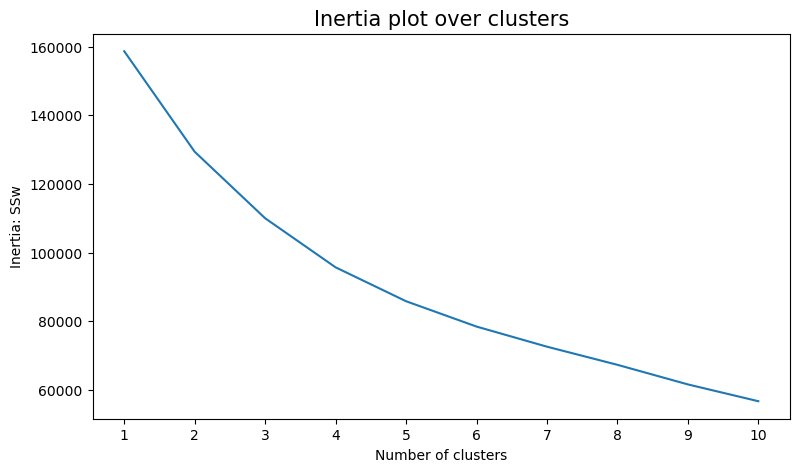

In [81]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.6139707012687379
For n_clusters = 3, the average silhouette_score is : 0.4798580920972597
For n_clusters = 4, the average silhouette_score is : 0.5453450220504071
For n_clusters = 5, the average silhouette_score is : 0.491732361496769
For n_clusters = 6, the average silhouette_score is : 0.39977848020810364
For n_clusters = 7, the average silhouette_score is : 0.43261935137136825
For n_clusters = 8, the average silhouette_score is : 0.3913309269073887
For n_clusters = 9, the average silhouette_score is : 0.4077071448000825
For n_clusters = 10, the average silhouette_score is : 0.3472771278568211


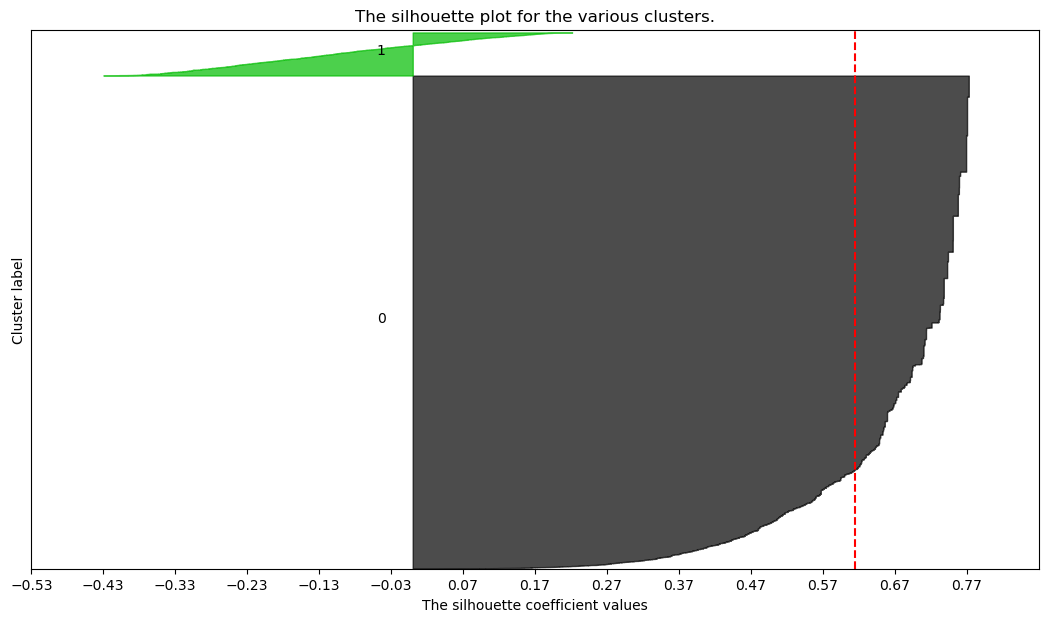

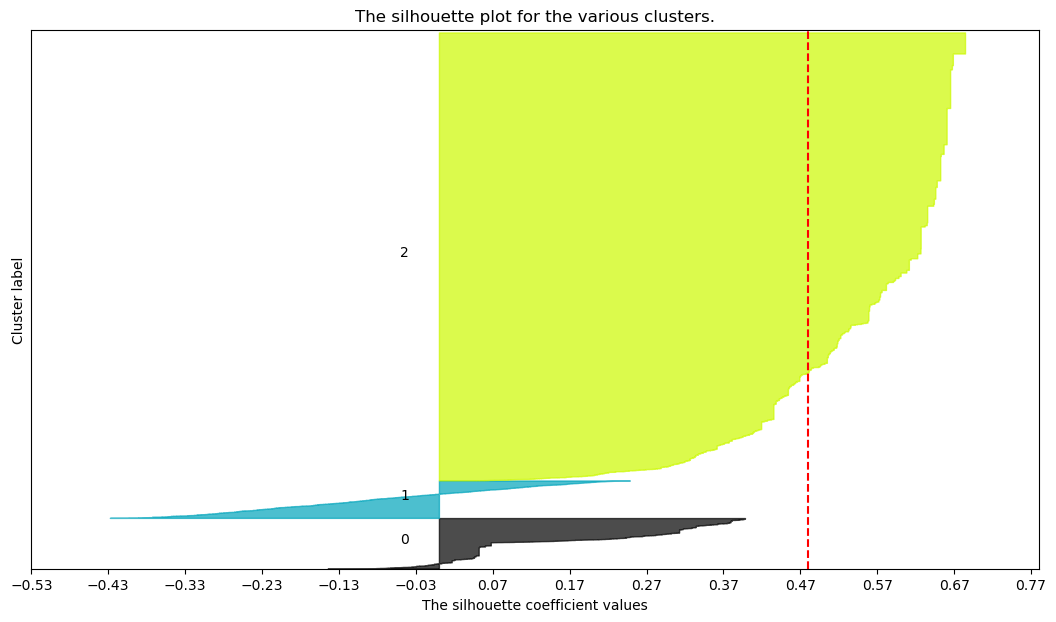

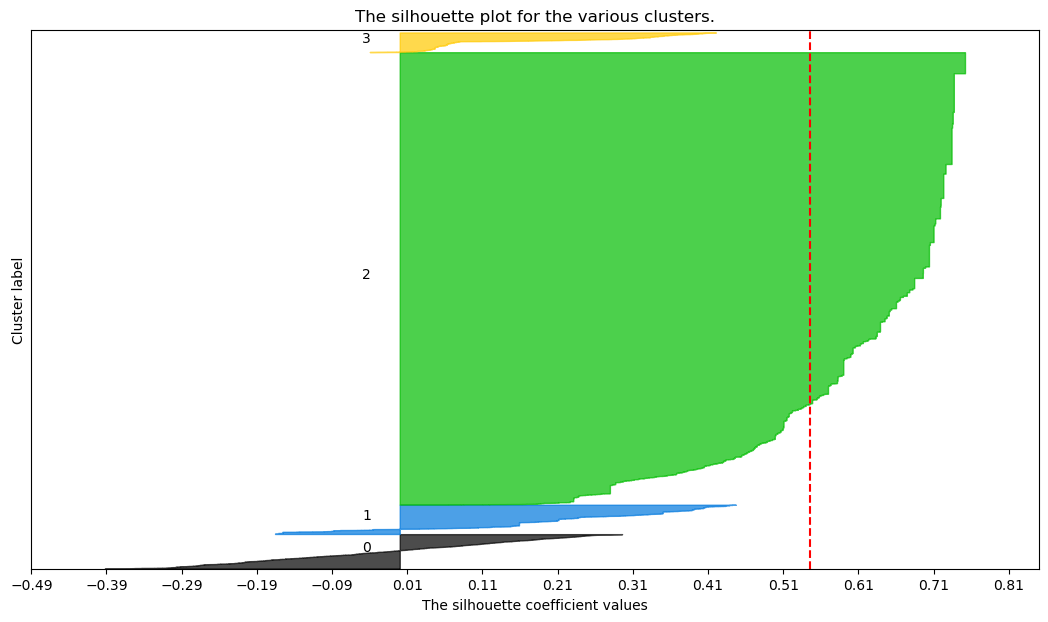

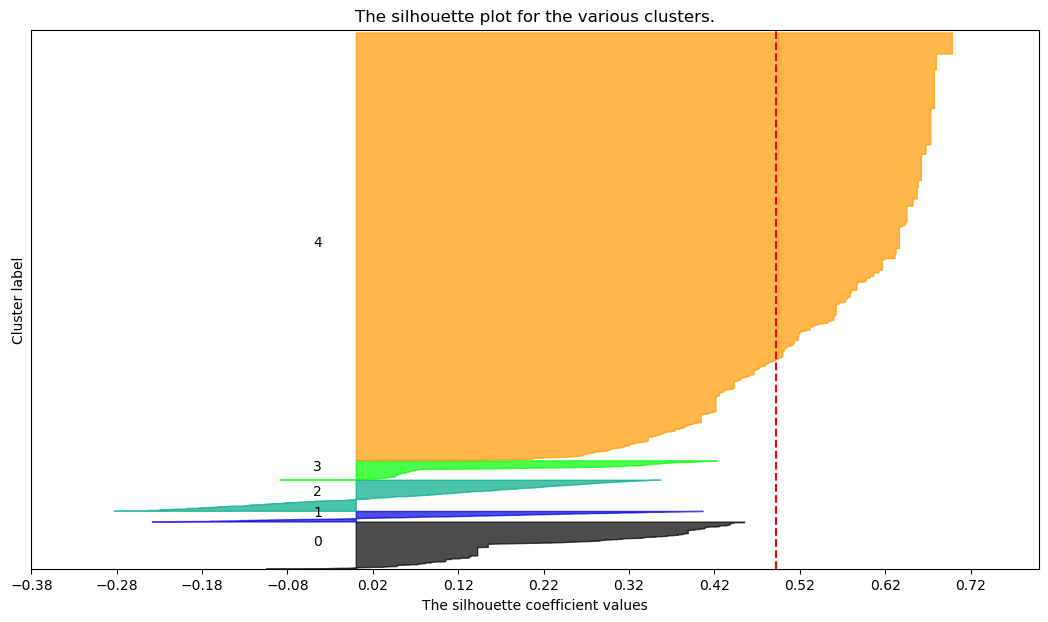

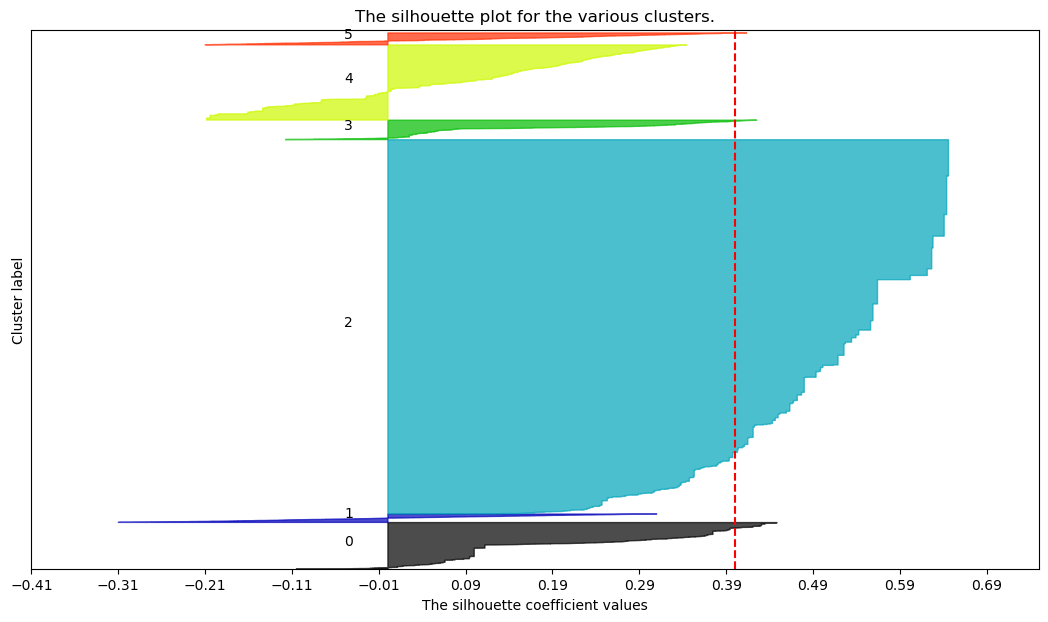

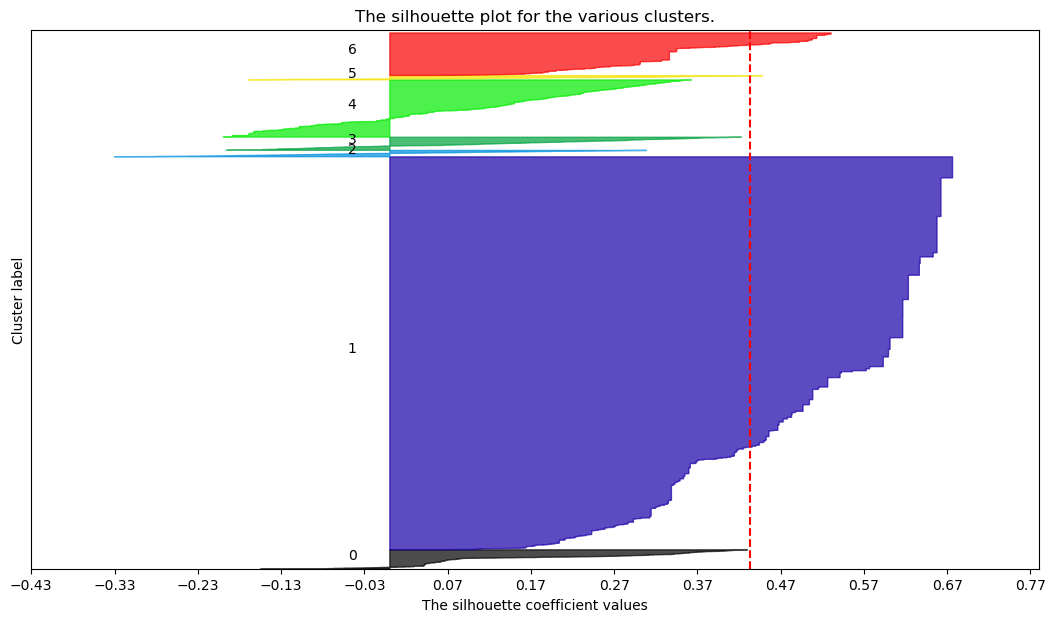

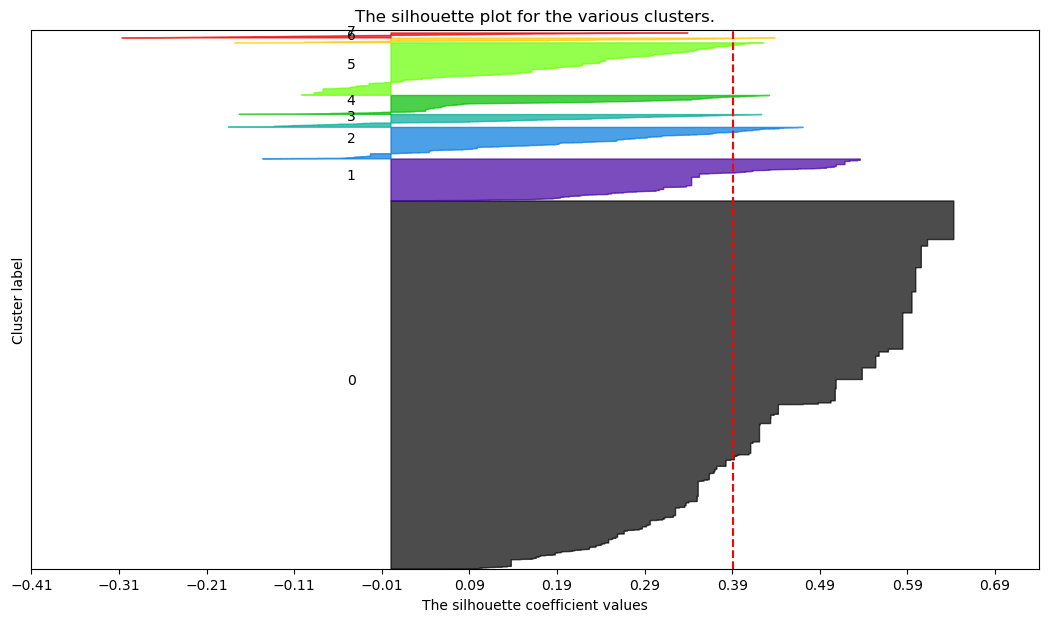

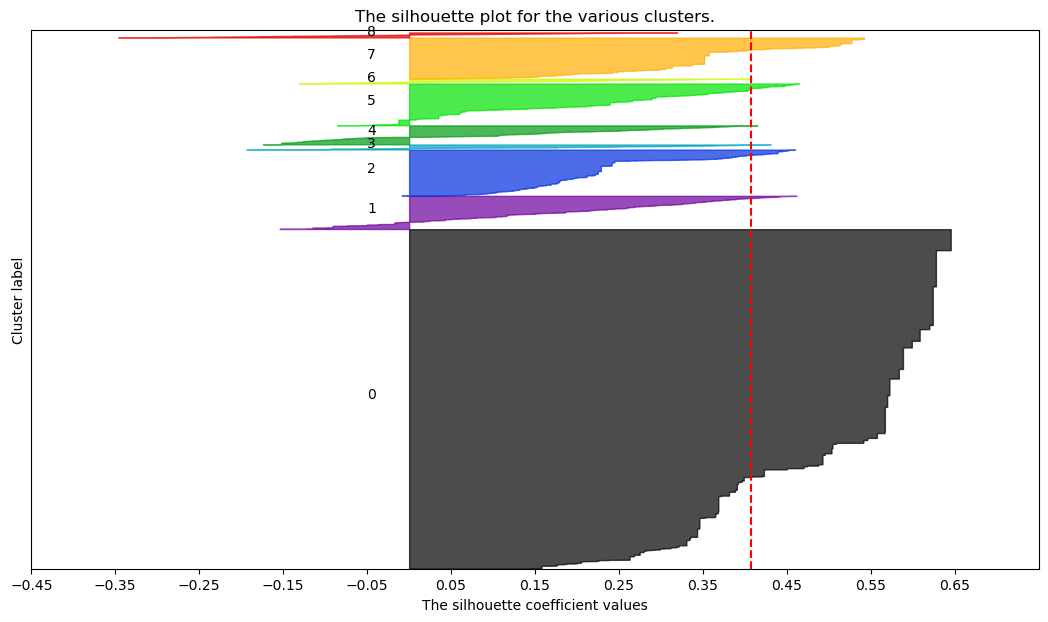

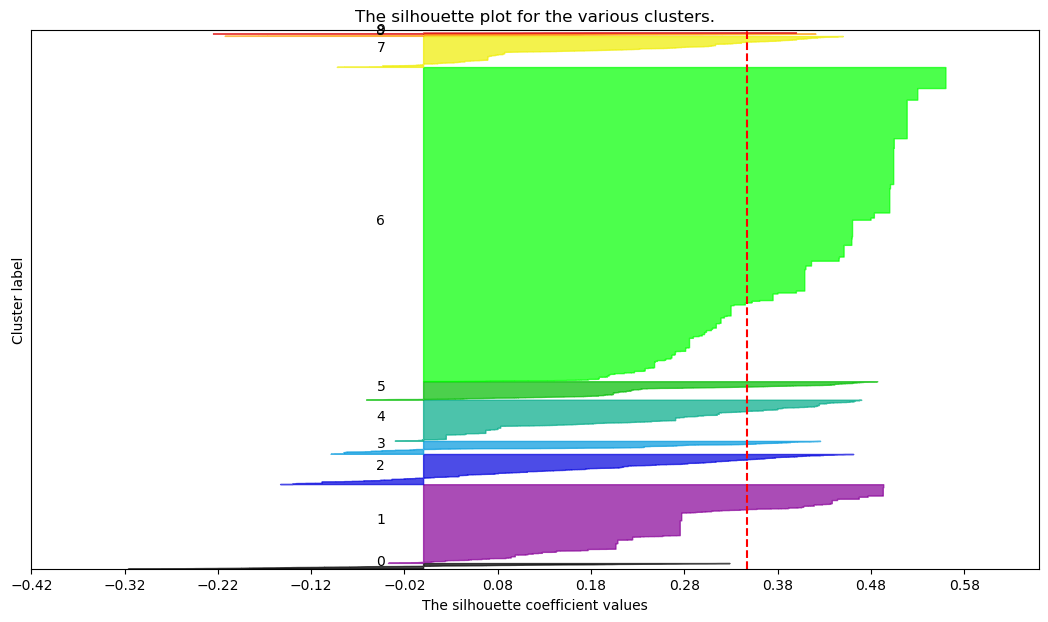

In [82]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(time_of_order_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(time_of_order_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(time_of_order_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [83]:
#K-means with K=2 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat.groupby('labels').mean()

morning_orders  midday_orders  evening_orders  night_orders  \
labels                                                                
0             1.301696       2.316109        2.219957      0.090616   
1             0.693304      -0.154906       -0.513519      0.003491   
2            -0.141505      -0.171163       -0.148221     -0.169152   
3            -0.054049       0.115199        0.289718      3.740848   

        drinking_orders  
labels                   
0             -0.272623  
1              3.110265  
2             -0.186247  
3              0.136044

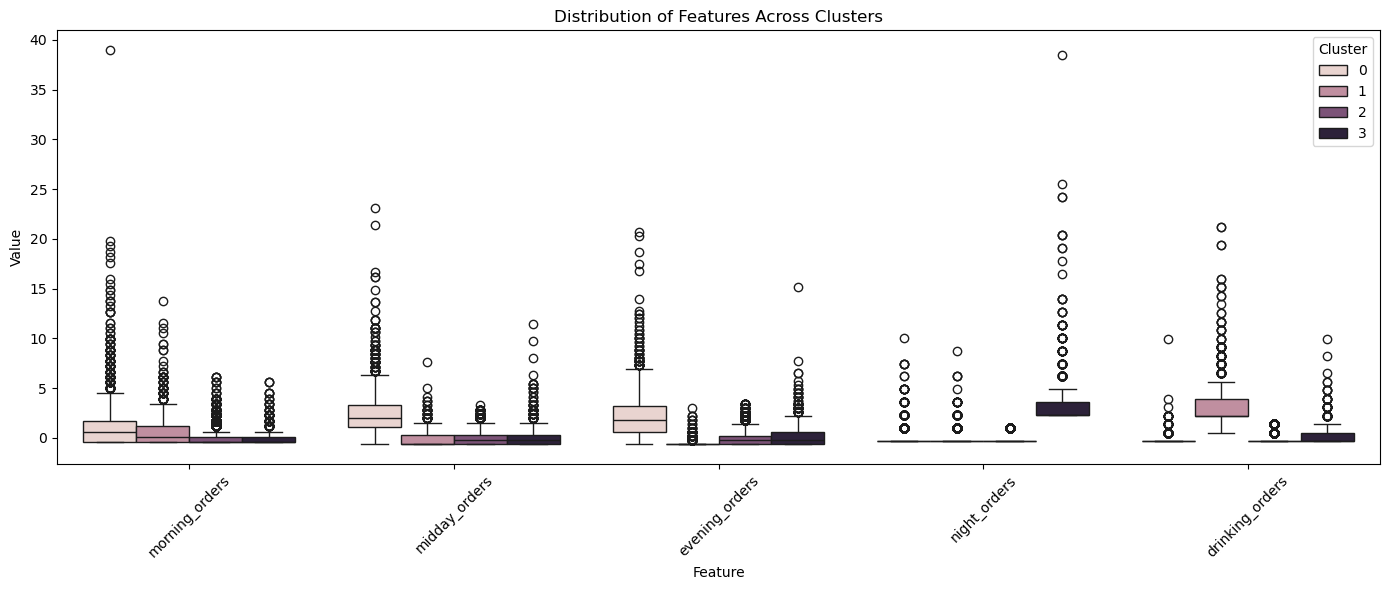

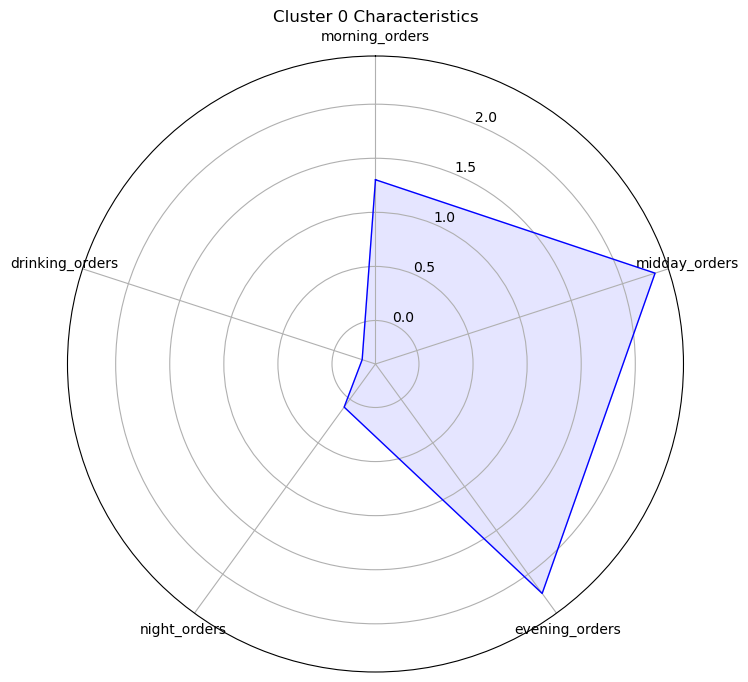

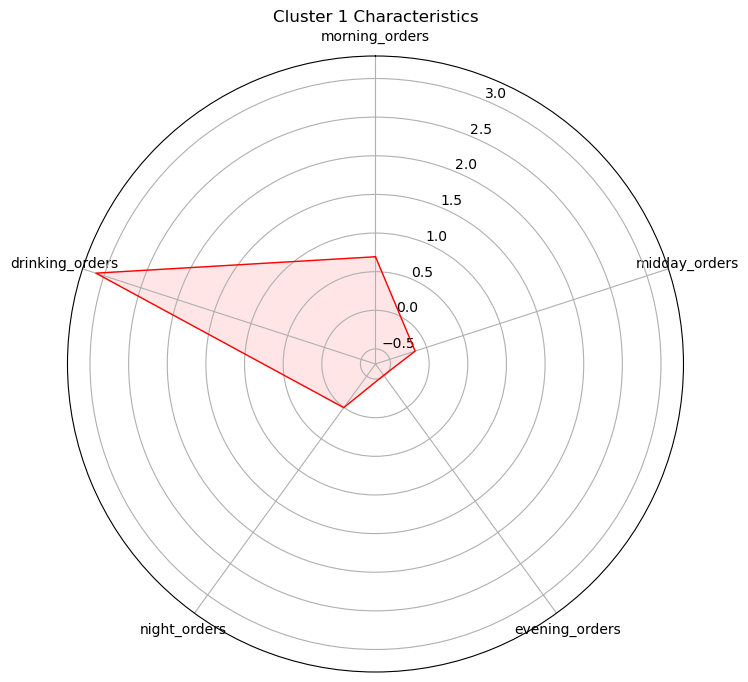

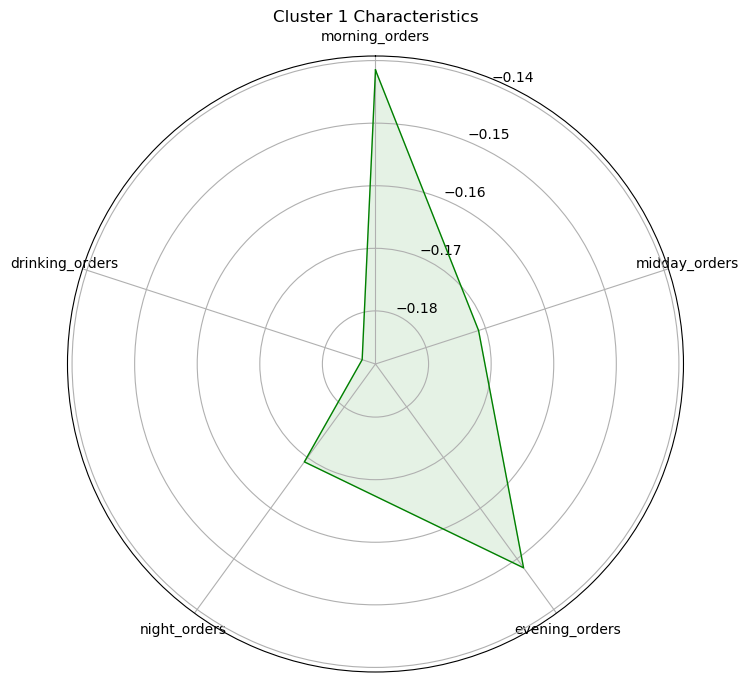

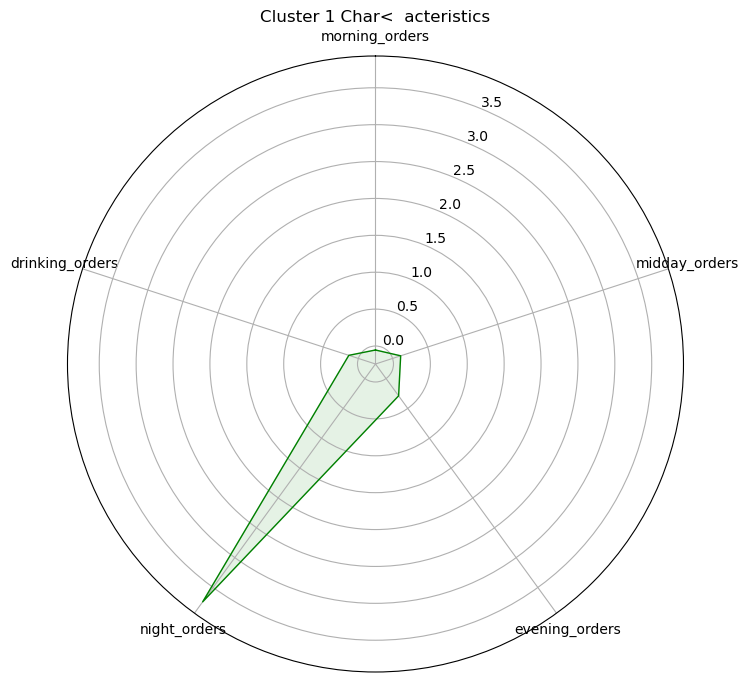

Cluster Centroids:
         morning_orders  midday_orders  evening_orders  night_orders  \
Cluster                                                                
0              1.301696       2.316109        2.219957      0.090616   
1              0.693304      -0.154906       -0.513519      0.003491   
2             -0.141505      -0.171163       -0.148221     -0.169152   
3             -0.054049       0.115199        0.289718      3.740848   

         drinking_orders  
Cluster                   
0              -0.272623  
1               3.110265  
2              -0.186247  
3               0.136044  


In [88]:


# Assuming df_scaled_new is your scaled dataframe
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders']]

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(time_of_order_features)

    # Concatenate labels with features
    df_concat = pd.concat([time_of_order_features, pd.Series(km_labels, name='Cluster', index=time_of_order_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'green')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

<a href="#Index">Back to Index</a>

# t-SNE

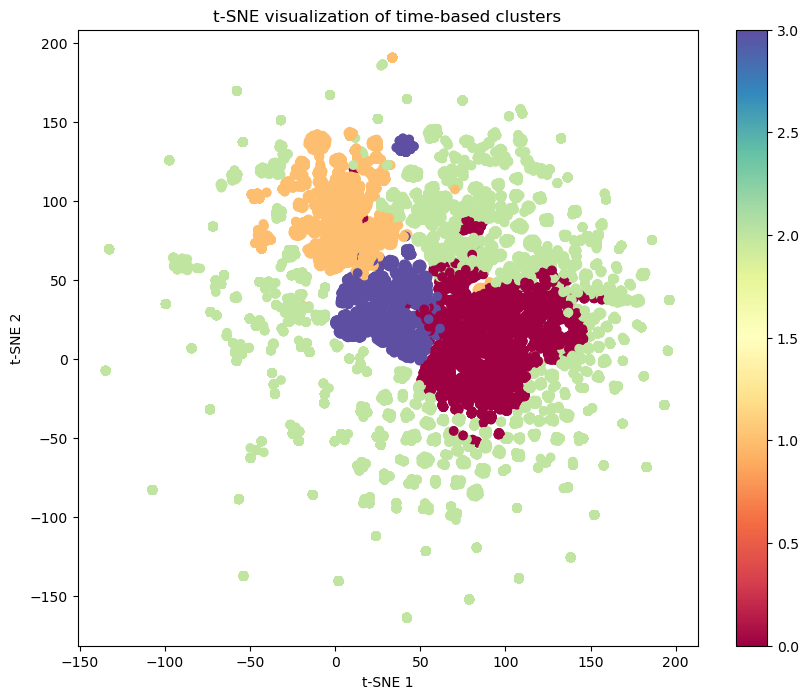

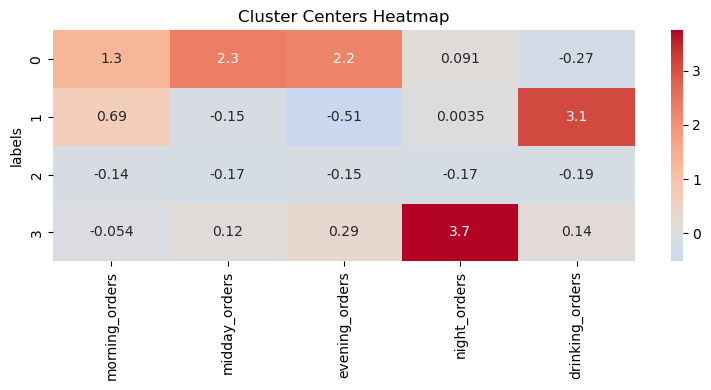

In [85]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Create t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_of_order_features)

# Create visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=km_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('t-SNE visualization of time-based clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Add cluster center heatmap
centers_df = df_concat.groupby('labels').mean()
plt.figure(figsize=(8, 4))
sns.heatmap(centers_df, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Centers Heatmap')
plt.tight_layout()
plt.show()

# DBSCAN

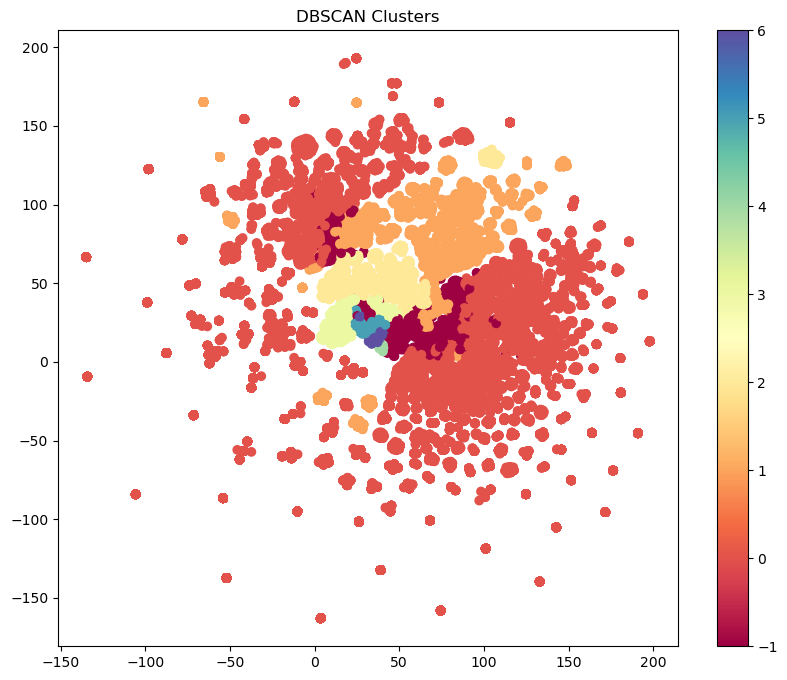

DBSCAN - Clusters: 7, Noise: 531


In [91]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Scale and cluster
scaler = StandardScaler()
time_features_scaled = scaler.fit_transform(time_of_order_features)
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan_labels = dbscan.fit_predict(time_features_scaled)

# Visualize
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_features_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('DBSCAN Clusters')
plt.show()

print(f'DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}, Noise: {list(dbscan_labels).count(-1)}')

<a href="#Index">Back to Index</a>

# Hierarchical

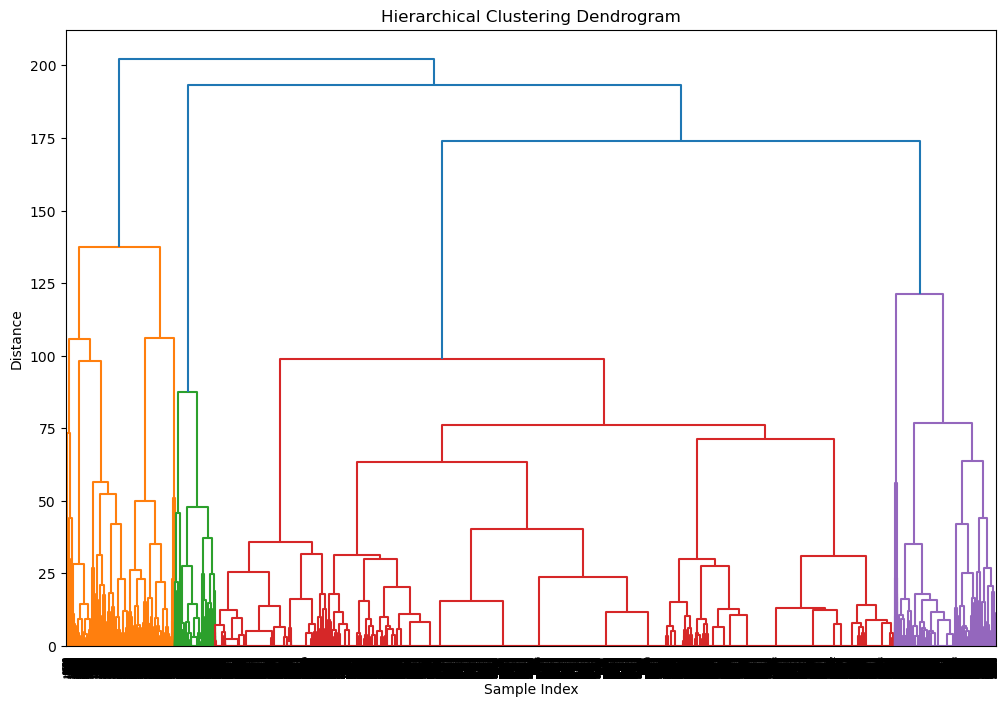

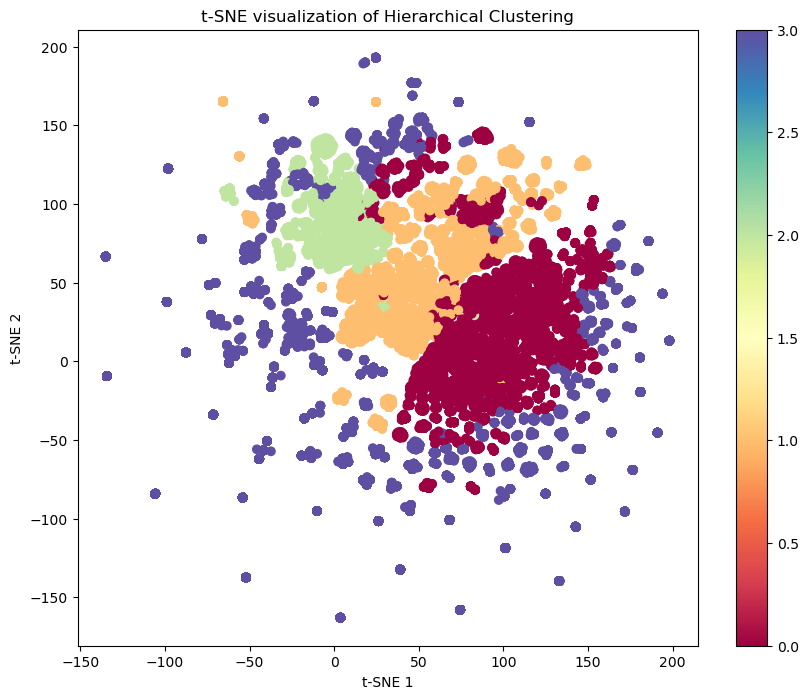

Cluster 0 size: 3721
Cluster 1 size: 3435
Cluster 2 size: 1375
Cluster 3 size: 23206


In [92]:
# Scale features 
scaler = StandardScaler()
time_features_scaled = scaler.fit_transform(time_of_order_features)

# Create linkage matrix for dendrogram
linkage_matrix = linkage(time_features_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Perform hierarchical clustering
n_clusters = 4  
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(time_features_scaled)

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(time_features_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=hierarchical_labels, cmap='Spectral')
plt.colorbar(scatter)
plt.title('t-SNE visualization of Hierarchical Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Show cluster sizes
for i in range(n_clusters):
   print(f'Cluster {i} size: {sum(hierarchical_labels == i)}')

<a href="#Index">Back to Index</a>

# SOM

**Some generally used functions:**

In [18]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='x-small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)




    return sf 

In [20]:
order_time_features = [
    'morning_orders', 'midday_orders', 'evening_orders', 'night_orders', 'drinking_orders'
]
order_time_features

['morning_orders',
 'midday_orders',
 'evening_orders',
 'night_orders',
 'drinking_orders']

In [21]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(order_time_features)
learning_rate = .7


som_data = df_treated[order_time_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))


Before training:
QE 0.6927
TE 0.9718
After training:
QE 0.4518
TE 0.212


In [24]:
# Get the weights from the trained SOM
weights = sm.get_weights()

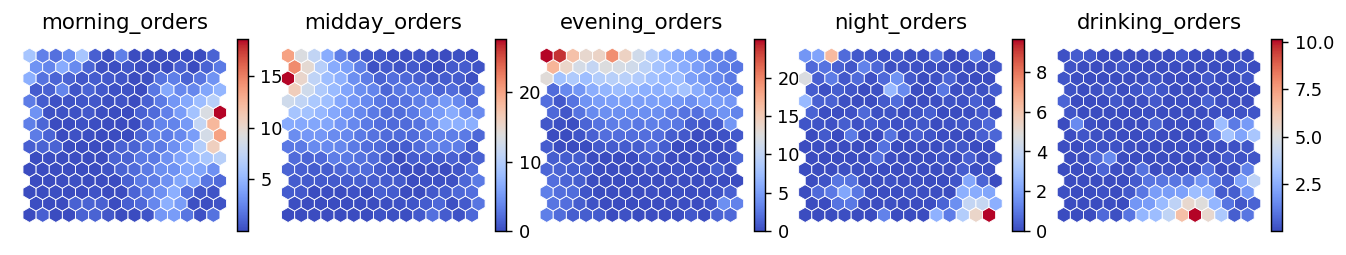

In [25]:
##############################
# Plot Component Planes
##############################
figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,5,wspace=.05, hspace=.05)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(order_time_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=order_time_features[cpi],
                    cmap=cm.coolwarm,
                    )

These Self-Organizing Maps (SOMs) show ordering patterns across different times of day in what appears to be a restaurant or food service setting.

Key patterns:
- Morning: Scattered hotspots, suggesting variable breakfast order patterns
- Midday: More concentrated hotspots, indicating consistent lunch rush patterns
- Evening: Distinct clusters, showing regular dinner service patterns
- Night: Mostly uniform with one strong outlier, suggesting late-night ordering follows predictable patterns
- Drinking: Very uniform with minimal variation, indicating consistent beverage ordering behavior

The color scales vary (0-15, 0-20, 0-8, etc.), showing different intensity ranges for each time period. The hexagonal grid pattern helps visualize clustering of similar orders.

The darker red spots represent order peaks or anomalies in the typical patterns, while the blue regions show baseline ordering behavior.

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.2.'></a>
># 2.2. Cluster Analysis: High spenders/low spenders across all periods of the day

In [17]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
km_labels = kmclust.fit_predict(time_of_order_features)

# Characterizing the final clusters
df_concat_time_of_order = pd.concat((time_of_order_features, pd.Series(km_labels, name='labels', index=time_of_order_features.index)), axis=1)
df_concat_time_of_order.groupby('labels').mean()

morning_orders  midday_orders  evening_orders  night_orders  \
labels                                                                
0             1.301696       2.316109        2.219957      0.090616   
1             0.693304      -0.154906       -0.513519      0.003491   
2            -0.141505      -0.171163       -0.148221     -0.169152   
3            -0.054049       0.115199        0.289718      3.740848   

        drinking_orders  
labels                   
0             -0.272623  
1              3.110265  
2             -0.186247  
3              0.136044

In [18]:
# Analysis: Excellent clusters. 1) High spenders for morning/midday evening, 2) High spenders for drinking orders, 3) Generally low spenders, 4) High spenders for night_orders


chatgpt summary 

1. Silhouette Score Analysis:
The silhouette scores show that k=2 yields the best clustering quality (0.614), followed by k=4 (0.545). This suggests that customers' ordering patterns can be most distinctly separated into either 2 or 4 groups. The high silhouette score for k=2 indicates very clear separation between these two primary behavioral patterns.

2. Cluster Characteristics:
Looking at the centroid values for your k=4 clustering:

Cluster 0 (Day-Round Active Customers):
- High positive values for morning (1.30), midday (2.32), and evening (2.22) orders
- Slightly negative for drinking hours (-0.27)
- These are customers who order consistently throughout the day but avoid late-night ordering
- Represents balanced, regular customers who might be ordering for both personal and business purposes

Cluster 1 (Night Owls with Early Morning Activity):
- Moderate positive value for morning orders (0.69)
- Notably high value for drinking hours (3.11)
- Negative values for midday (-0.15) and evening (-0.51)
- These customers show a distinctive pattern of ordering during unconventional hours
- Might represent young professionals or students with non-traditional schedules

Cluster 2 (Low-Frequency Customers):
- All negative values across different time periods
- Consistently low engagement (-0.14 to -0.19 across all times)
- These customers order less frequently than average across all time periods
- Could represent occasional users or price-sensitive customers

Cluster 3 (Night-Time Specialists):
- Extremely high value for night orders (3.74)
- Slightly positive for evening orders (0.29)
- These customers strongly prefer ordering during night hours
- Might represent late-night workers or entertainment venue orders

3. Hierarchical Clustering Results:
Your hierarchical clustering reveals an interesting size distribution:
- Cluster 0: 3,721 customers
- Cluster 1: 3,435 customers
- Cluster 2: 1,375 customers
- Cluster 3: 23,206 customers

This distribution shows that the majority of customers (23,206) fall into Cluster 3, suggesting that night-time ordering is the dominant pattern in your customer base.

4. Business Implications:

Marketing Strategy:
- Target Cluster 0 with lunch specials and business lunch promotions
- Create special late-night menus for Cluster 3
- Develop early morning/breakfast offerings for Cluster 1
- Design win-back campaigns for Cluster 2

Operational Recommendations:
- Ensure strong staffing during night hours to serve the large Cluster 3 customer base
- Maintain consistent service quality during peak hours for Cluster 0
- Consider expanding early morning options for Cluster 1
- Optimize operations during night hours, as this appears to be a crucial business period

5. Visualization Insights:
The t-SNE visualizations show clear separation between clusters, particularly in the time-based clustering, which validates the statistical findings from your silhouette analysis. The DBSCAN results suggest there might be some noise in the data, but the core clusters are still distinguishable.

This clustering analysis provides a strong foundation for personalized marketing strategies and operational planning, with clear evidence that your customer base has distinct temporal ordering patterns that can be leveraged for business optimization.

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.3.'></a>
># 2.3. Cuisine Preference Clustering 

# original w/ PCA

In [19]:
cui_features = df_scaled_new[['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']]

In [20]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(cui_features)
pca_feat  

array([[ 1.05228776, -0.5572159 , -1.06349912, ..., -0.95359149,
        -0.14054738, -0.53661054],
       [-0.14186991, -0.63175178, -0.01389621, ..., -0.02096669,
         0.15230997, -0.06991338],
       [-0.06248433, -0.75273931,  0.02211549, ..., -0.01009324,
        -0.03074076, -0.12268839],
       ...,
       [-0.93824223,  0.34602493, -0.10957459, ..., -0.33779528,
        -0.05657773, -0.22263759],
       [-0.2212555 , -0.51076425, -0.04990791, ..., -0.03184013,
         0.3353607 , -0.01713837],
       [-0.06248433, -0.75273931,  0.02211549, ..., -0.01009324,
        -0.03074076, -0.12268839]])

In [21]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

Eigenvalue  Difference  Proportion  Cumulative
1     1.455321    0.000000    0.145528    0.145528
2     1.336088   -0.119234    0.133605    0.279132
3     1.025878   -0.310210    0.102585    0.381717
4     0.968269   -0.057609    0.096824    0.478541
5     0.956680   -0.011589    0.095665    0.574206
6     0.921877   -0.034803    0.092185    0.666390
7     0.895620   -0.026257    0.089559    0.755949
8     0.870911   -0.024709    0.087088    0.843038
9     0.805905   -0.065005    0.080588    0.923626
10    0.763767   -0.042138    0.076374    1.000000

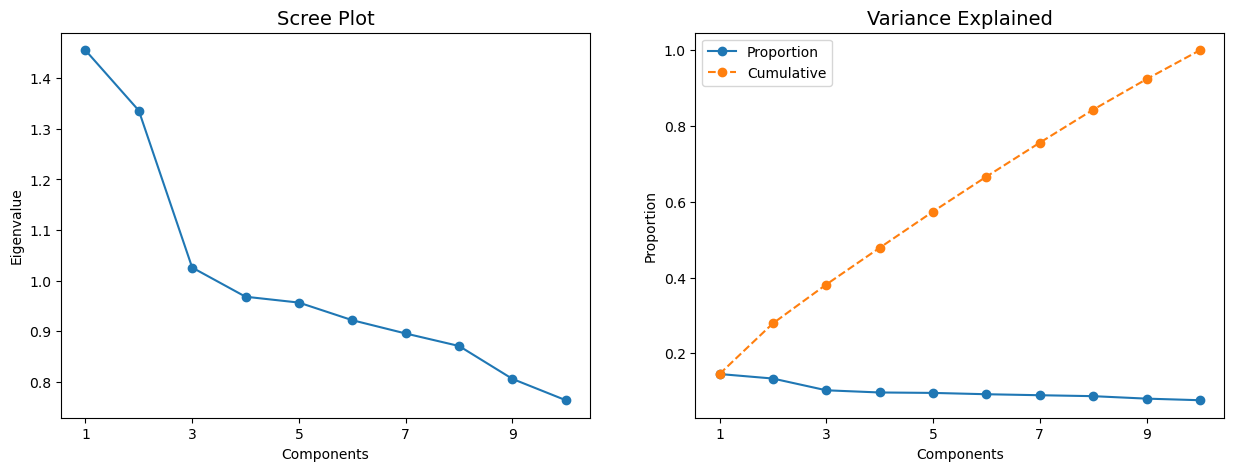

In [22]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [23]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(cui_features)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=cui_features.index, columns=pca_feat_names)  
pca_df

PC0       PC1       PC2       PC3
0      1.052288 -0.557216 -1.063499  1.833791
1     -0.141870 -0.631752 -0.013896 -0.120904
2     -0.062484 -0.752739  0.022115 -0.103349
3      0.442339 -0.371889 -0.715033  1.034736
4     -0.591722  0.053844 -0.217962 -0.220383
...         ...       ...       ...       ...
31732 -0.489499 -0.143897  0.916754  0.903647
31733 -0.062484 -0.752739  0.022115 -0.103349
31734 -0.938242  0.346025 -0.109575  1.107053
31735 -0.221255 -0.510764 -0.049908 -0.138459
31736 -0.062484 -0.752739  0.022115 -0.103349

[31737 rows x 4 columns]

<a href="#Index">Back to Index</a>

# K-Means

In [24]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(pca_df)
km_labels = kmclust.fit_predict(pca_df)

# Characterizing the final clusters
df_concat = pd.concat((pca_df, pd.Series(km_labels, name='labels', index=pca_df.index)), axis=1)
df_concat.groupby('labels').mean()

PC0       PC1       PC2       PC3
labels                                        
0       0.039942 -0.318515  0.052313 -0.033635
1      -2.114323  2.650446  1.633299  2.331662
2       4.027894  2.224996 -0.688336  1.168314
3      -1.257925  1.700789 -0.868872 -0.888226

<a href="#Index">Back to Index</a>

# SOM

In [32]:
cui_features = ['CUI_Japanese', 'CUI_Chinese', 'CUI_Indian', 'CUI_Thai', 'CUI_Desserts', 'CUI_Cafe', 'CUI_Street Food / Snacks', 'CUI_Beverages','CUI_Asian','CUI_OTHER']

In [33]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 20
N = 20
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(cui_features)
learning_rate = .7




# Increase map size
M = 20
N = 20

# Adjust learning parameters
learning_rate = 0.5
neighborhood_function = 'gaussian'
n_iterations = 30000

# Train with more epochs for better feature representation
sm = MiniSom(M, N, 
             n_feats,
             learning_rate=learning_rate, 
             topology='hexagonal',
             neighborhood_function=neighborhood_function)

som_data = df_treated[cui_features].values

print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))


Before training:
QE 19.0948
TE 0.9901
After training:
QE 3.3739
TE 0.2271


In [34]:
# Get the weights from the trained SOM
weights = sm.get_weights()

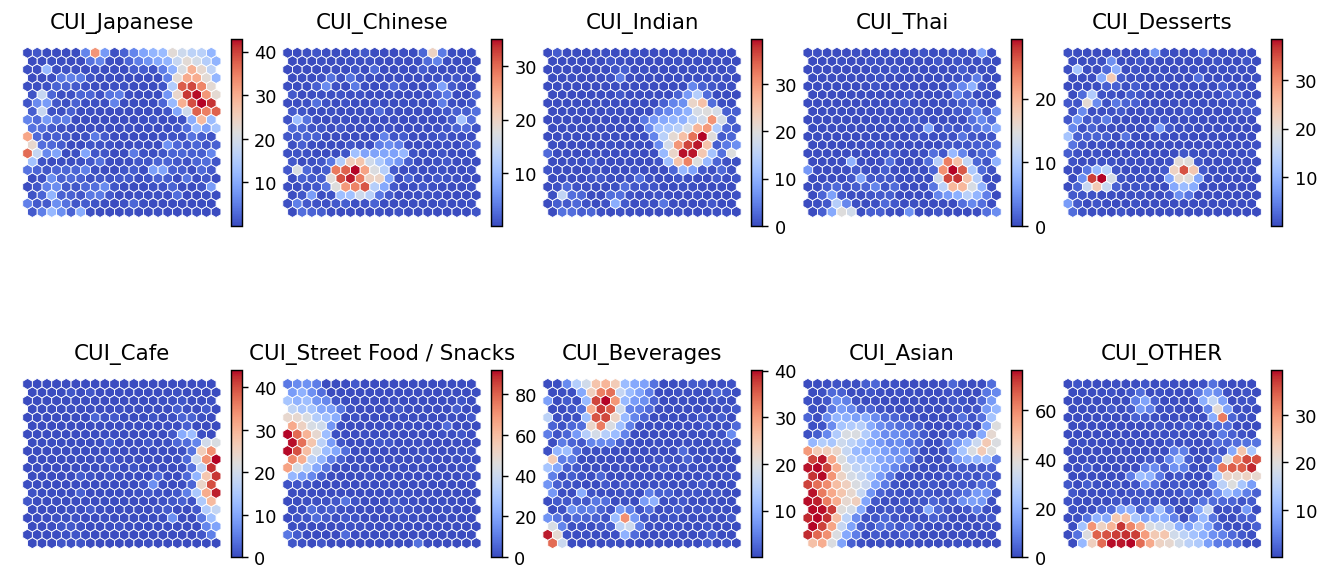

In [35]:
##############################
# Plot Component Planes
##############################

figsize=(10, 5)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

#subfigs = fig.subfigures(2, 5, wspace=.08, hspace=.07)  # 2x5 for 10 features
subfigs = fig.subfigures(2, 5, wspace=.08, hspace=.07).flatten()  # 2x5 for 10 features
colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi in range(len(cui_features)):
    if cpi >= len(subfigs) or cpi >= weights.shape[2]:
        break
    sf = subfigs[cpi]
    # Rest of plotting code
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=cui_features[cpi],
                    cmap=cm.coolwarm,
                    )

Analysis of cuisine distribution SOMs across 20x20 hexagonal grid:

Japanese: Strong cluster center-right (40+ intensity)
Chinese: Concentrated bottom-right hotspot (30+)
Indian: Right-side cluster (30+)
Thai: Left-edge linear pattern (20+)
Desserts: Two distinct clusters (30+ intensity)
Cafe: Top-right concentration (40+)
Street Food: Top-center band (80+ intensity)
Beverages: Edge clusters top and right (40+)
Asian: Central dominant cluster (40+)
OTHER: Multiple scattered hotspots (60+ max)

Key insights:
- Street Food shows highest intensity (80+)
- Clear spatial separation between cuisines
- Asian cuisine has largest continuous cluster
- Beverages and OTHER show most dispersed patterns

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.4.'></a>
># 2.4. Cluster Analysis
**Some info on different cuisines... but not that good. Dominated by Asian cuisines and drinks really**
From ChatGPT:
Cluster Interpretation with Features
Based on the correlations and cluster centers:

Cluster 0 (Balanced cluster): Contains entities with moderate values across features.
Cluster 1 (PC1- and PC2-dominant): Likely represents entities with strong contributions from features like CUI_Asian, CUI_Street Food / Snacks, and CUI_Chinese.
Cluster 2 (PC0-dominant): Includes entities strongly influenced by CUI_OTHER, CUI_Thai, and slightly CUI_Cafe.
Cluster 3 (PC1-focus): Features such as CUI_Asian and CUI_Japanese might drive this cluster.

In [25]:
# Project the data onto the PCs
X_pca = pca.transform(cui_features)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(pca.n_components_)])

# Correlate original features with principal components
correlations = pd.DataFrame(
    np.dot(cui_features.T, X_pca_df) / (cui_features.shape[0] - 1),
    index=cui_features.columns,
    columns=[f'PC{i}' for i in range(pca.n_components_)]
)

print("Feature-PC Correlations:")
print(correlations)


Feature-PC Correlations:
                               PC0       PC1       PC2       PC3
CUI_Japanese              0.123132  0.514591 -0.317653 -0.492267
CUI_Chinese               0.197066  0.384772  0.695643 -0.289558
CUI_Indian                0.426853  0.068733 -0.293025  0.493503
CUI_Thai                  0.582133  0.303449  0.187315 -0.024525
CUI_Desserts             -0.389416  0.448549 -0.041278  0.358093
CUI_Cafe                  0.560971  0.388822 -0.321611  0.043696
CUI_Street Food / Snacks -0.526691  0.491139 -0.184564 -0.053652
CUI_Beverages            -0.289521  0.378982  0.427584  0.454257
CUI_Asian                -0.452057  0.632512 -0.144555 -0.066511
CUI_OTHER                 0.714819  0.371720  0.061053  0.153083


<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.5.'></a>
># 2.5. Order Volume Features

In [96]:
order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]

In [27]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(order_volume_features)
    inertia.append(kmclust.inertia_)  

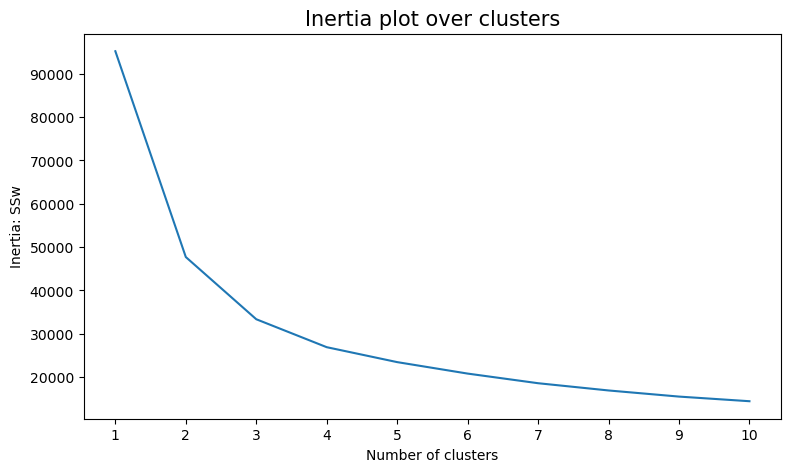

In [28]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.694340535039124
For n_clusters = 3, the average silhouette_score is : 0.5819351828577088
For n_clusters = 4, the average silhouette_score is : 0.5058109265880437
For n_clusters = 5, the average silhouette_score is : 0.43563777155379313
For n_clusters = 6, the average silhouette_score is : 0.4428310016273136
For n_clusters = 7, the average silhouette_score is : 0.4122570609982513
For n_clusters = 8, the average silhouette_score is : 0.3897245428121421
For n_clusters = 9, the average silhouette_score is : 0.40637228021140587
For n_clusters = 10, the average silhouette_score is : 0.4021954210993876


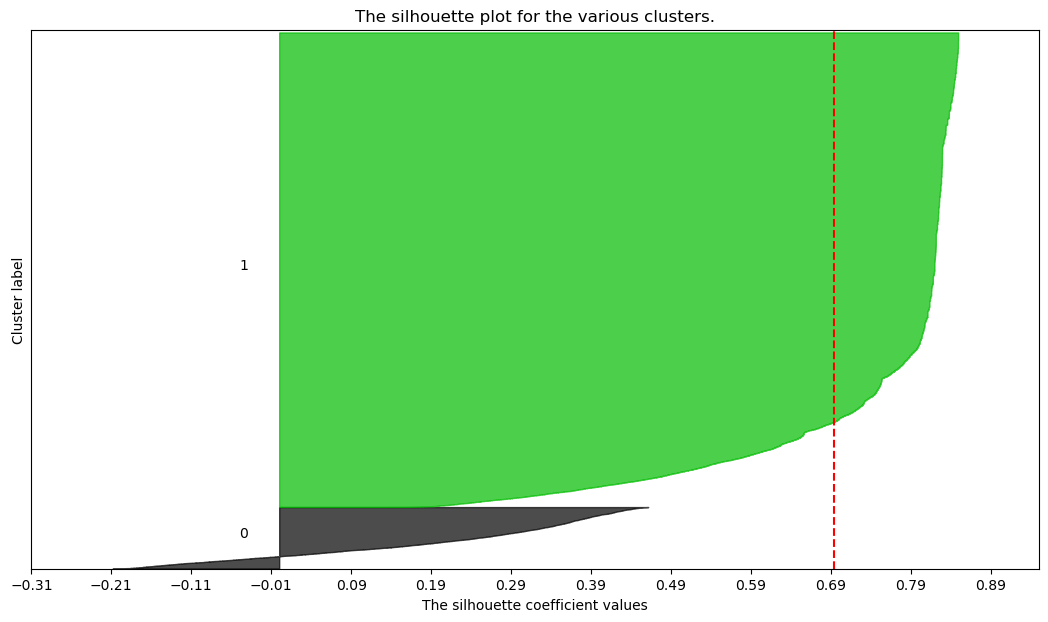

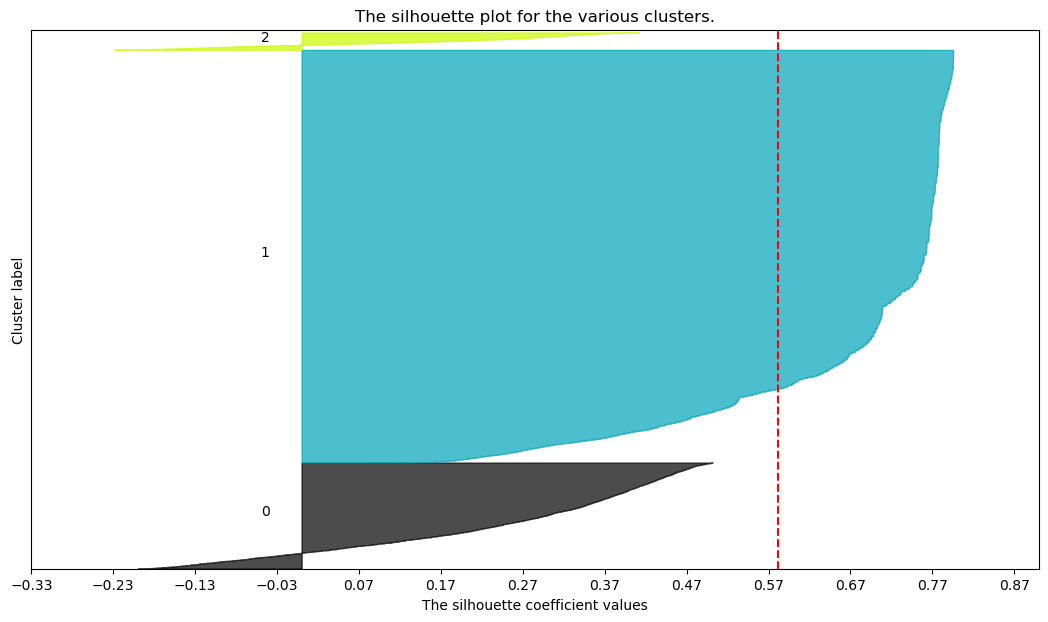

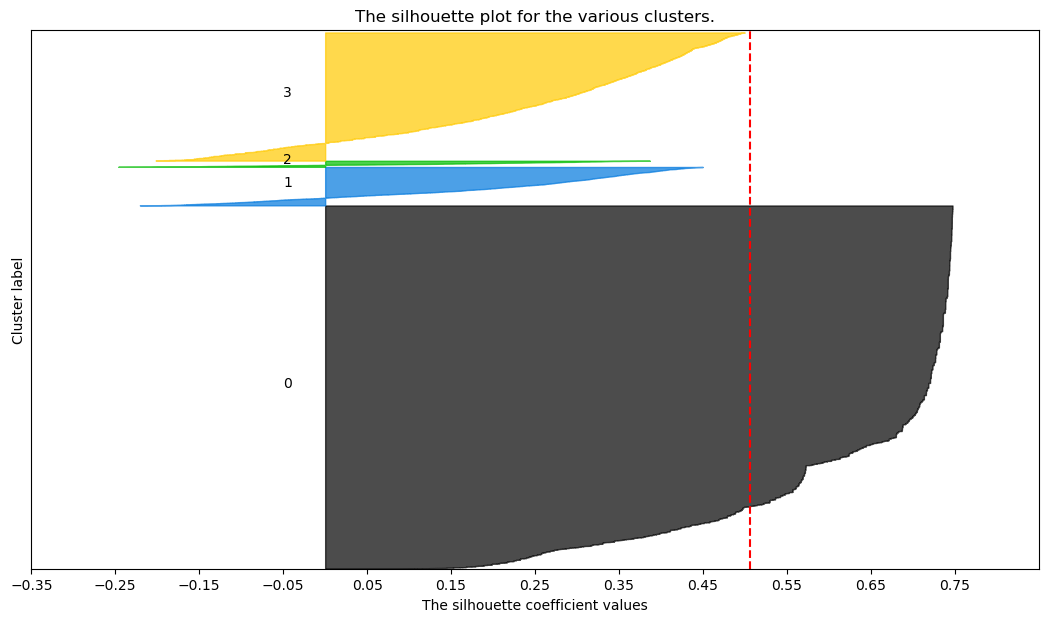

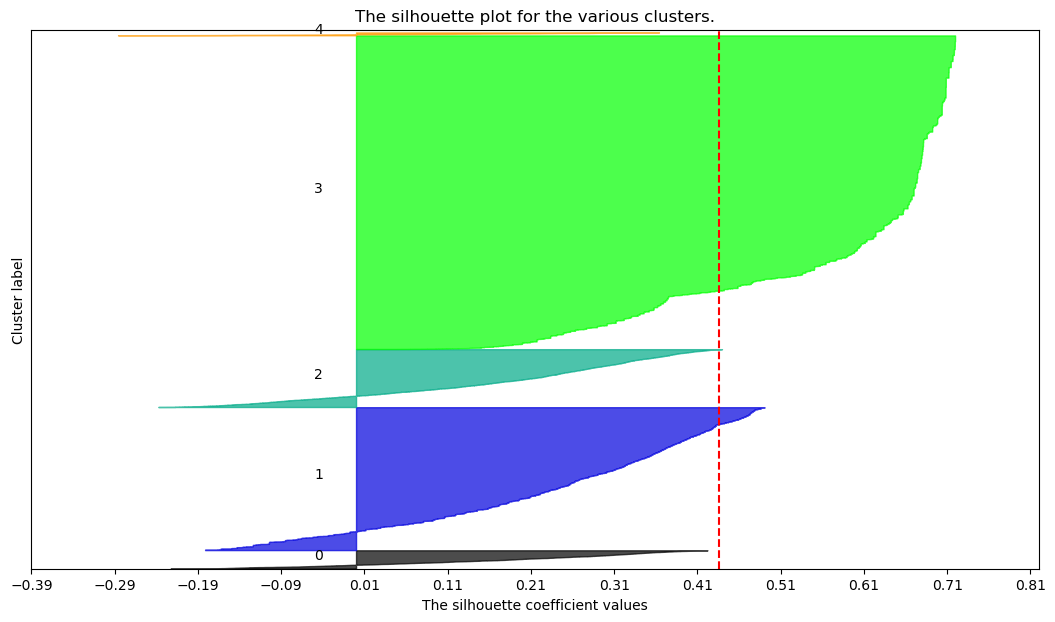

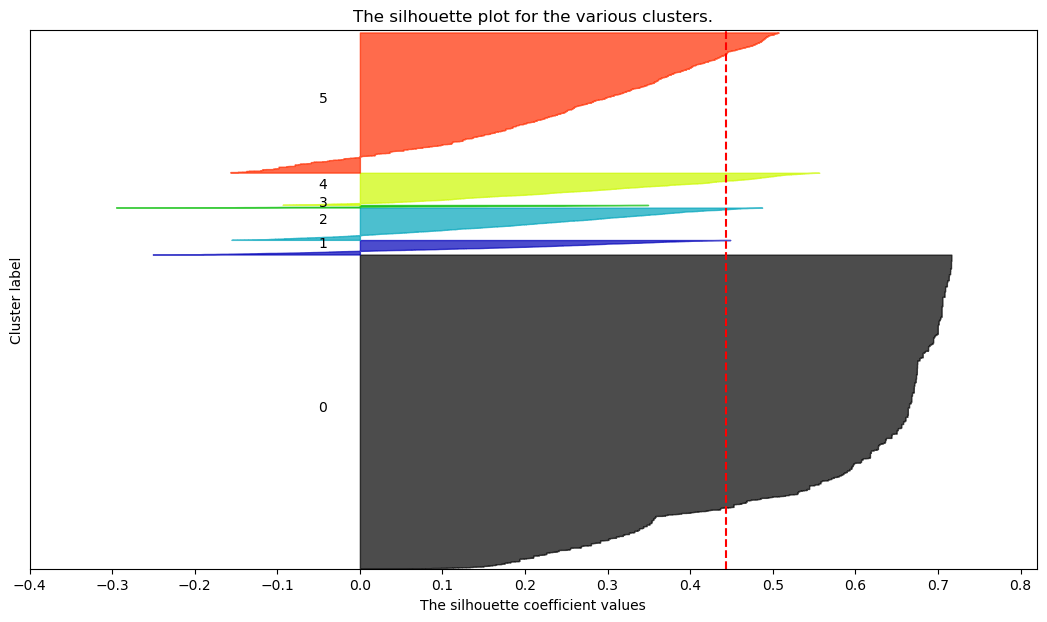

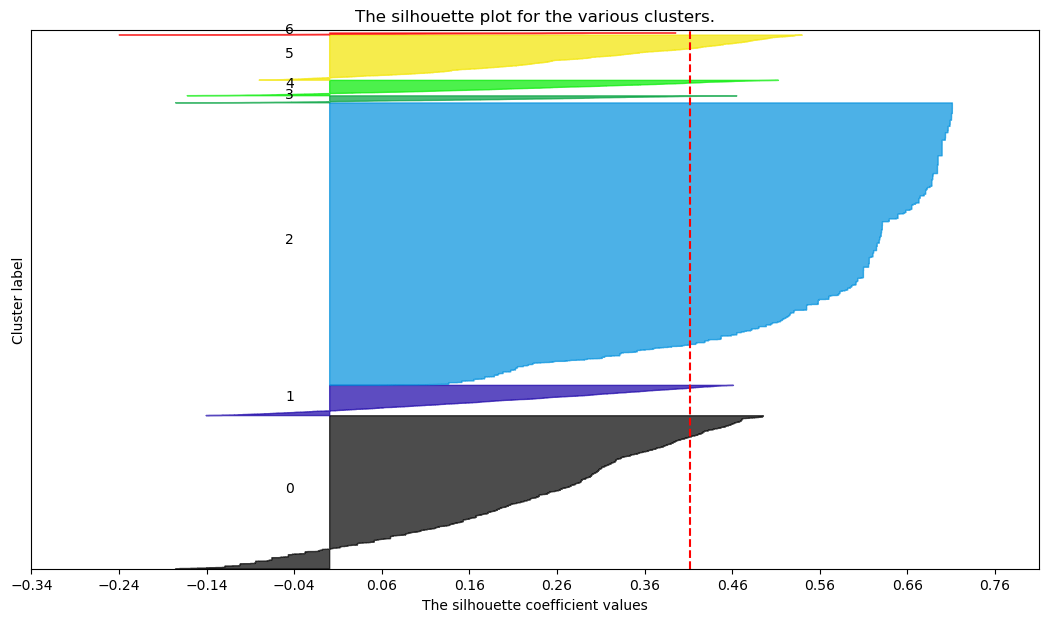

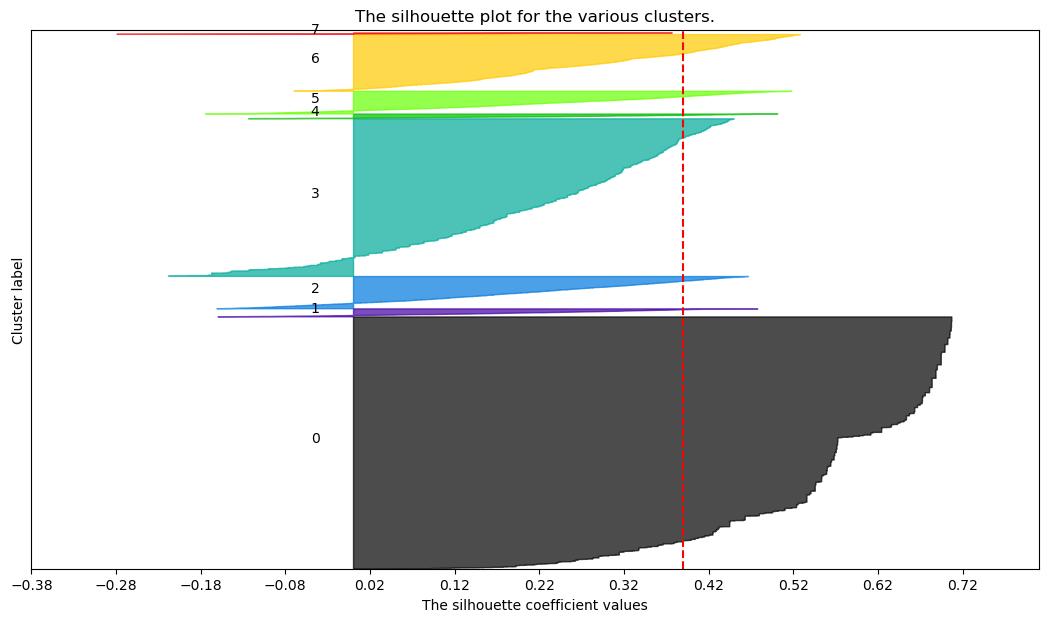

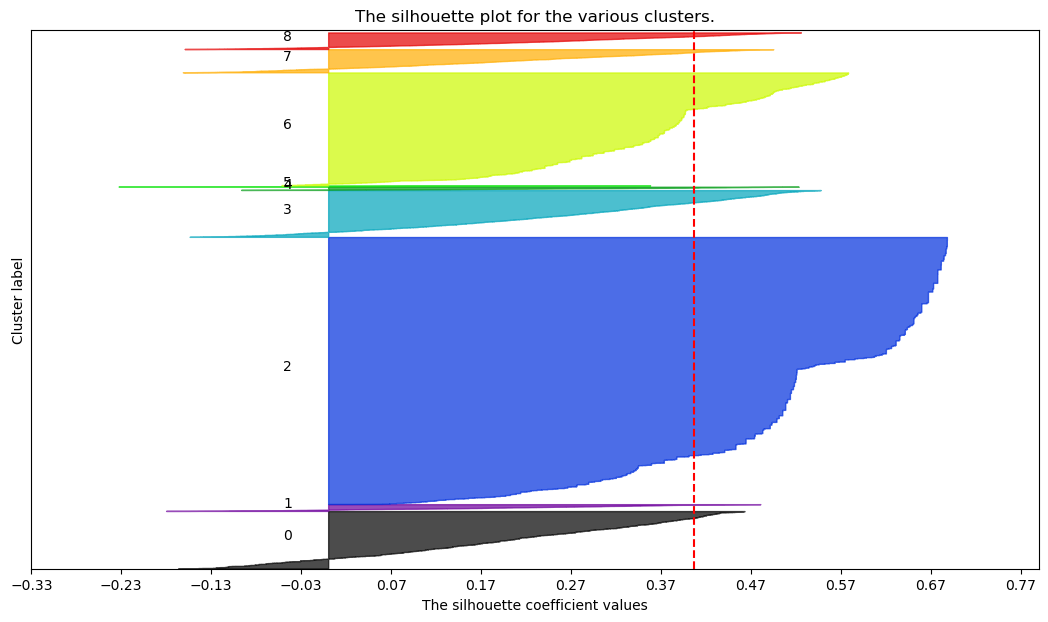

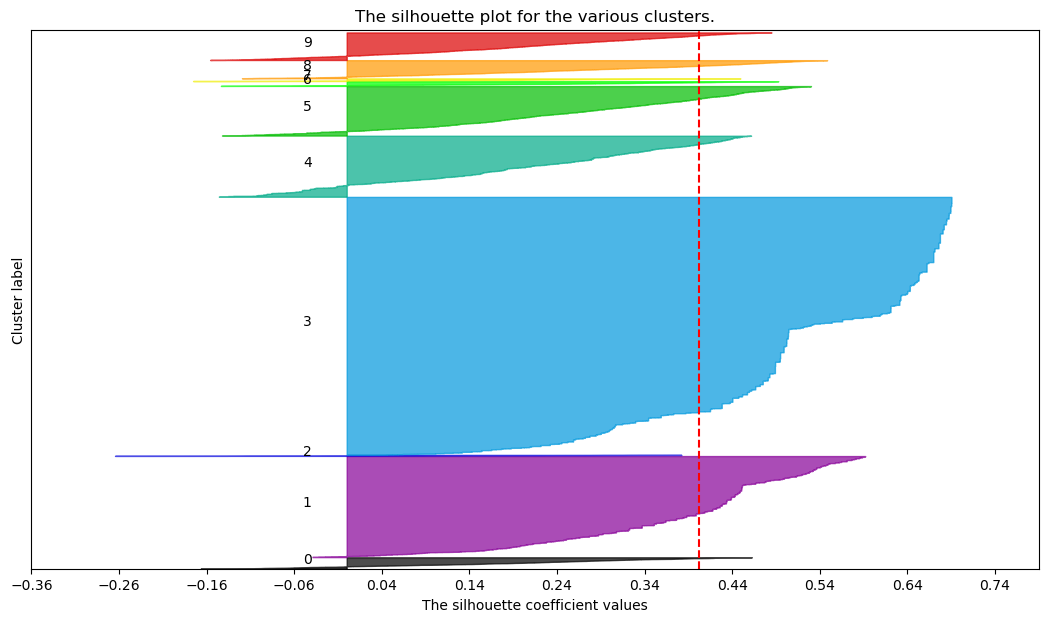

In [29]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(order_volume_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(order_volume_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(order_volume_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

<a href="#Index">Back to Index</a>

# K-Means

In [30]:
#K-means with K=2 for order volume columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0           2.021976        1.841829      2.017738
1          -0.262031       -0.238685     -0.261482

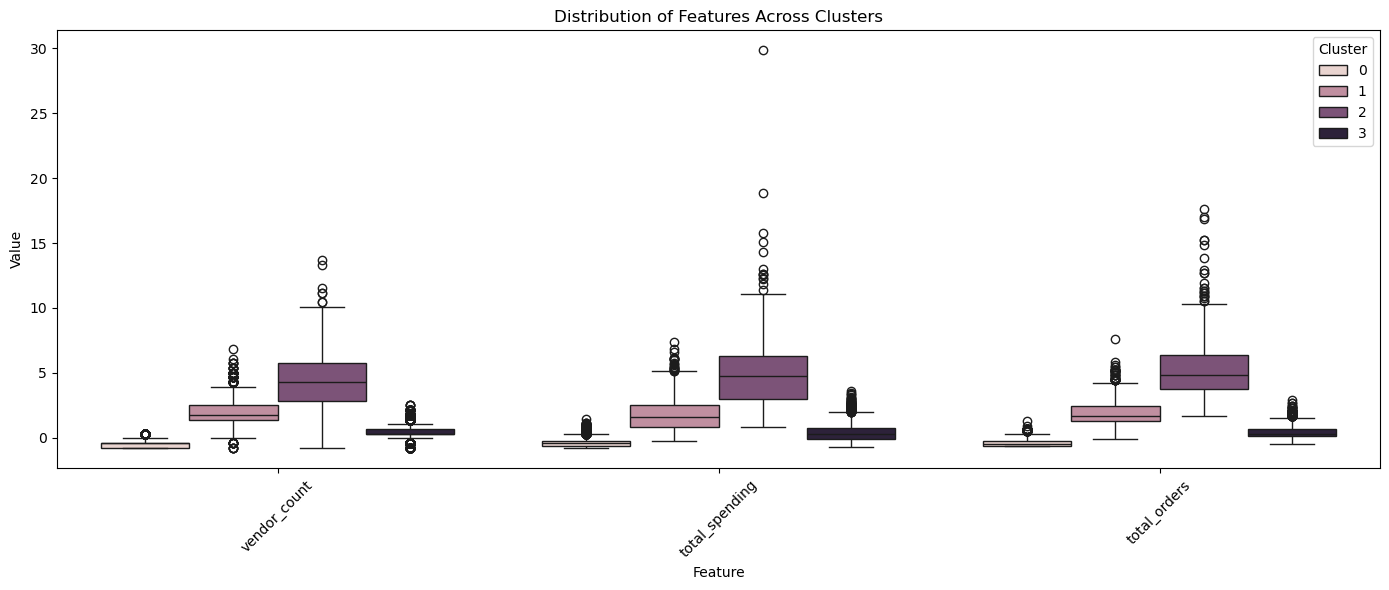

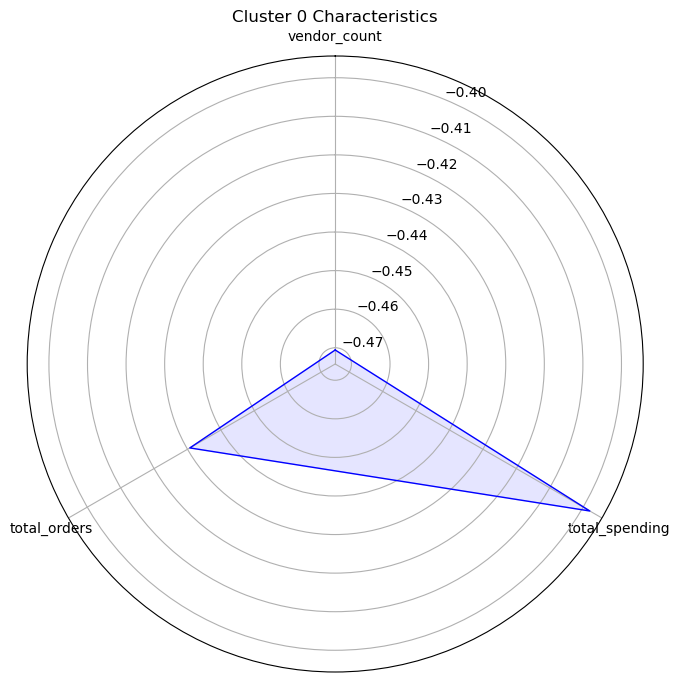

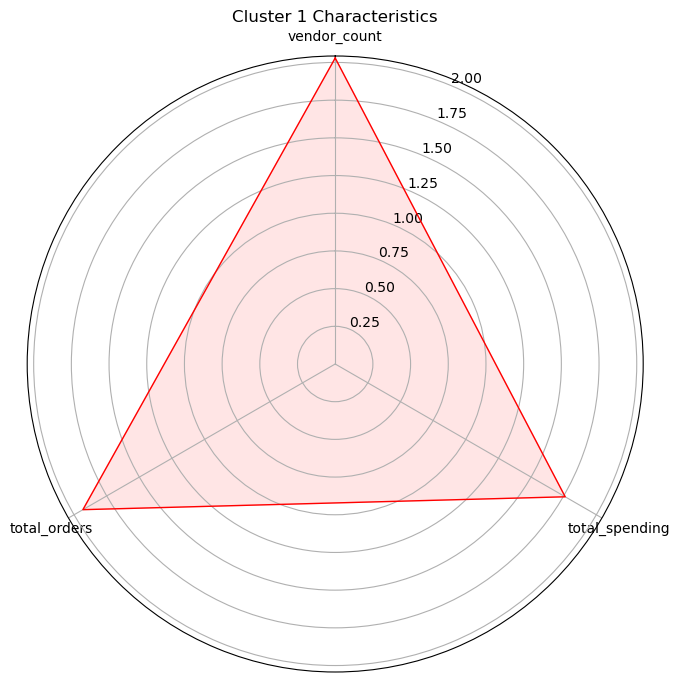

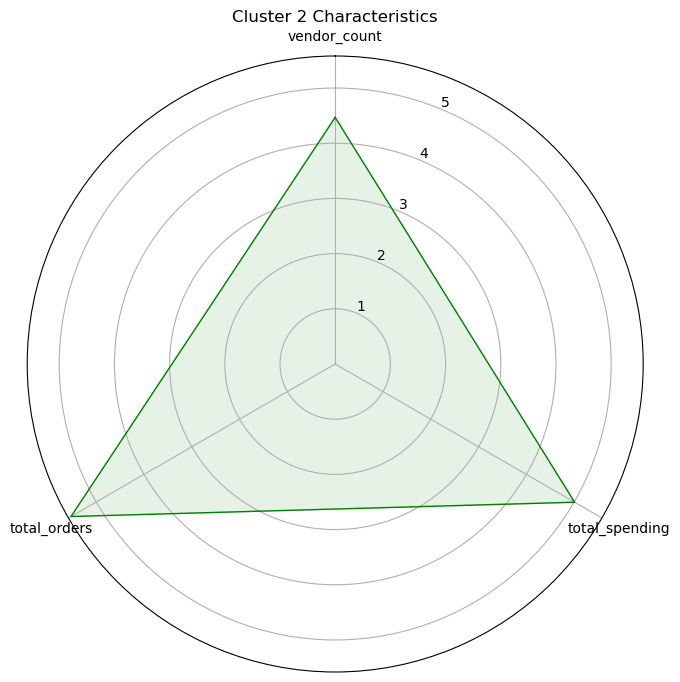

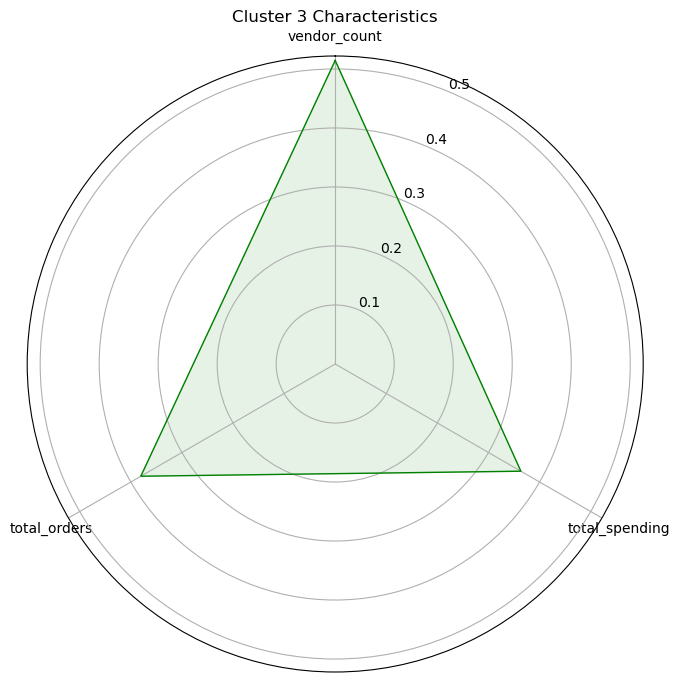

Cluster Centroids:
         vendor_count  total_spending  total_orders
Cluster                                            
0           -0.470584       -0.397997     -0.430700
1            2.029502        1.761609      1.932373
2            4.467926        5.009643      5.527548
3            0.514442        0.363375      0.380423


In [93]:

# Assuming df_scaled_new is your scaled dataframe
def perform_clustering_analysis(df_scaled_new):
    # Select time of order features
    order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]   

    # Perform K-means clustering
    kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
    km_labels = kmclust.fit_predict(order_volume_features)

    # Concatenate labels with features
    df_concat = pd.concat([order_volume_features, pd.Series(km_labels, name='Cluster', index=order_volume_features.index)], axis=1)



    plt.figure(figsize=(14, 6))
    df_melted = df_concat.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melted)
    plt.title('Distribution of Features Across Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    



    def make_spider(df, row, title, color):
        categories = list(df.columns)
        N = len(categories)
        
        # Prepare values
        values = df.iloc[row].tolist()
        values += values[:1]
        
        # Calculate angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Create plot
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
        ax.plot(angles, values, color=color, linewidth=1)
        ax.fill(angles, values, color=color, alpha=0.1)
        
        # Fix axis to go in the right order and start at 12 o'clock
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        
        # Draw axis lines for each angle and label
        plt.xticks(angles[:-1], categories)
        
        plt.title(title)
        plt.show()

    # Prepare cluster means
    cluster_means = df_concat.groupby('Cluster').mean()

    # Create radar charts
    make_spider(cluster_means, 0, 'Cluster 0 Characteristics', 'blue')
    make_spider(cluster_means, 1, 'Cluster 1 Characteristics', 'red')
    make_spider(cluster_means, 2, 'Cluster 2 Characteristics', 'green')
    make_spider(cluster_means, 3, 'Cluster 3 Characteristics', 'green')

    # 5. Cluster Centroids Comparison
    print("Cluster Centroids:")
    print(cluster_means)

    return km_labels, cluster_means

# Call the function with your scaled dataframe
km_labels, cluster_means = perform_clustering_analysis(df_scaled_new)

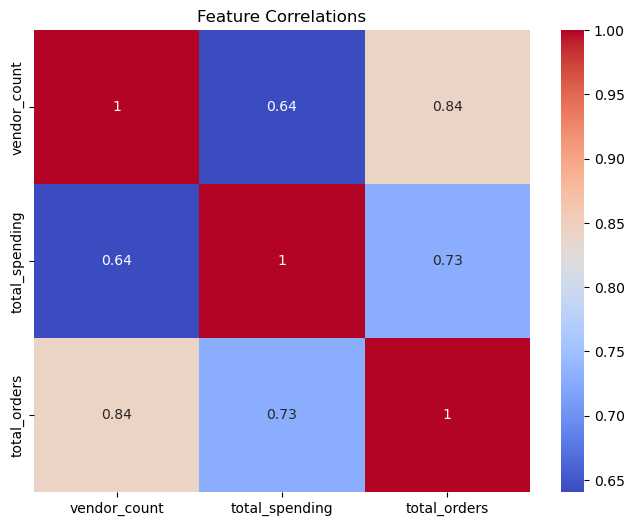

In [97]:
# Create correlation matrix between features
correlation_matrix = order_volume_features.corr()

# Visualize using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [98]:
# Add cluster assignments back to original data
order_volume_features['cluster'] = km_labels

# Calculate cluster statistics
for cluster in [0, 1]:
    cluster_data = order_volume_features[order_volume_features['cluster'] == cluster]
    print(f"\nCluster {cluster} Statistics:")
    print(cluster_data.describe())


Cluster 0 Statistics:
       vendor_count  total_spending  total_orders  cluster
count  21512.000000    21512.000000  21512.000000  21512.0
mean      -0.470584       -0.397997     -0.430700      0.0
std        0.293770        0.283927      0.222237      0.0
min       -0.763931       -0.809646     -0.665945      0.0
25%       -0.763931       -0.614445     -0.665945      0.0
50%       -0.402940       -0.440933     -0.469387      0.0
75%       -0.402940       -0.267421     -0.272829      0.0
max        0.319042        1.446007      1.299635      0.0

Cluster 1 Statistics:
       vendor_count  total_spending  total_orders  cluster
count   2273.000000     2273.000000   2273.000000   2273.0
mean       2.029502        1.761609      1.932373      1.0
std        1.051022        1.204564      0.952805      0.0
min       -0.763931       -0.289110     -0.076271      1.0
25%        1.402015        0.795338      1.299635      1.0
50%        1.763007        1.576141      1.692751      1.0
75%       

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_99329/3545105494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_volume_features['cluster'] = km_labels


<a href="#Index">Back to Index</a>

# SOM

In [36]:
order_volume_features = ['vendor_count', 'product_count', 'total_spending', 'total_orders']

In [37]:
# M = 0
# N = 0
# neighborhood_function = None 
# topology = None 
# n_feats = len(metric_features)
# learning_rate = None

M = 15
N = 15
neighborhood_function = 'gaussian' 
topology = 'hexagonal' 
n_feats = len(order_volume_features)
learning_rate = .7


som_data = df_treated[order_volume_features].values

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data) 


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



Before training:
QE 2.279
TE 0.9657
After training:
QE 1.6028
TE 0.4505


In [38]:
# Get the weights from the trained SOM
weights = sm.get_weights()

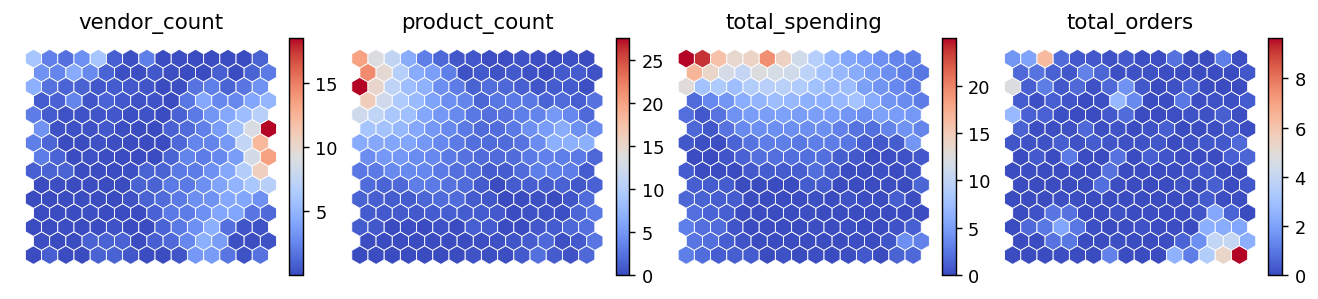

In [ ]:
##############################
# Plot Component Planes
##############################

figsize=(10, 10)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(1,4,wspace=.08, hspace=.07)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(order_volume_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=order_volume_features[cpi],
                    cmap=cm.coolwarm,
                    )

Analysis of order volume SOM maps:

Vendor count: Scattered hotspots (max 15), primarily in right region, showing clusters of multi-vendor orders

Product count: High concentration (25) in top-left, indicating zones of large basket sizes

Total spending: Strong peaks (20+) in top, correlating with product count patterns

Total orders: More uniform distribution with isolated peak (8+), suggesting consistent order volumes with occasional high-traffic nodes

The maps reveal clear clustering of high-value, multi-item orders in specific regions, while general order volume remains relatively evenly distributed.

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.6.'></a>

># 2.6. Cluster Analysis

# Low spenders/ high spenders

In [31]:
#K-means with K=3 for order volume columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0           0.986775        0.769539      0.827363
1          -0.393604       -0.339775     -0.370304
2           3.346573        3.393121      3.767359

# low spenders, high spenders, medium spenders

In [32]:
#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
km_labels = kmclust.fit_predict(order_volume_features)

# Characterizing the final clusters
df_concat_order_volume = pd.concat((order_volume_features, pd.Series(km_labels, name='labels', index=order_volume_features.index)), axis=1)
df_concat_order_volume.groupby('labels').mean()

vendor_count  total_spending  total_orders
labels                                            
0          -0.470584       -0.397997     -0.430700
1           2.029502        1.761609      1.932373
2           4.467926        5.009643      5.527548
3           0.514442        0.363375      0.380423

# Analysis: low spenders, high spenders, medium spenders, very very high spenders

# Cluster Analysis:

Feature Correlations Analysis:
The correlation matrix shows interesting relationships between your volume metrics:

1. Vendor Count and Total Orders (0.84):
- This strong positive correlation indicates that customers who order from more vendors tend to place more orders overall
- This suggests customers aren't just loyal to a few vendors but are actively exploring different options
- The high correlation might indicate an opportunity to encourage vendor exploration among less active customers

2. Total Spending and Total Orders (0.73):
- The moderately strong correlation here is expected but interestingly not as high as vendor count/total orders
- This suggests some variation in order values - not all frequent orderers are necessarily big spenders
- There might be different price sensitivity segments within your active customers

3. Vendor Count and Total Spending (0.64):
- The relatively lower correlation here is particularly interesting
- It suggests that exploring more vendors doesn't automatically lead to higher spending
- This could indicate price comparison behavior or varying price points across vendors

Cluster Statistics Analysis:

Cluster 0 (Low-Volume Segment, 21,512 customers):
- Mean values are all negative, showing consistently below-average behavior
- Very tight standard deviations (0.22-0.29) indicate a homogeneous group
- The max values show some potential for growth - some customers are starting to show higher activity
- Key characteristics:
  * Vendor count: -0.47σ below mean
  * Total spending: -0.40σ below mean
  * Total orders: -0.43σ below mean

Cluster 1 (High-Volume Segment, 2,273 customers):
- Much smaller but more valuable segment
- Higher standard deviations (0.95-1.20) show more variety in behavior
- Substantially higher means across all metrics
- Key characteristics:
  * Vendor count: +2.03σ above mean
  * Total spending: +1.76σ above mean
  * Total orders: +1.93σ above mean

Business Implications:

1. Customer Base Structure:
- You have a "90-10" type distribution with about 9.5% of customers driving significantly higher volumes
- This suggests potential for targeted growth strategies for the larger low-volume segment

2. Growth Opportunities:
- The low-volume cluster shows some customers reaching into positive territory (max values > 0)
- This indicates potential for "graduation" strategies to move customers from one segment to another
- The tight clustering in the low-volume segment suggests consistent barriers or behaviors to address

3. Strategic Recommendations:
- Consider developing a "customer advancement" program to move Cluster 0 customers toward Cluster 1 behavior
- Look at the characteristics of customers at the top end of Cluster 0 to understand what drives higher engagement
- For Cluster 1, focus on retention and maintaining their high engagement levels
- The strong vendor count correlations suggest that encouraging vendor exploration could be a key growth strategy

Would you like to explore any of these aspects in more detail or shall we look at additional analyses to further understand these segments?

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.7.'></a>
># 2.7. Day of Week Orders

In [33]:
df_scaled_original.columns

Index(['vendor_count ', 'product_count ', 'is_chain ', 'last_order ',
       'CUI_American ', 'CUI_Asian ', 'CUI_Beverages ', 'CUI_Cafe ',
       'CUI_Chicken Dishes ', 'CUI_Chinese ', 'CUI_Desserts ', 'CUI_Healthy ',
       'CUI_Indian ', 'CUI_Italian ', 'CUI_Japanese ', 'CUI_Noodle Dishes ',
       'CUI_OTHER ', 'CUI_Street Food / Snacks ', 'CUI_Thai ', 'DOW_0 ',
       'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ', 'HR_1 ',
       'HR_2 ', 'HR_3 ', 'HR_4 ', 'HR_5 ', 'HR_6 ', 'HR_7 ', 'HR_8 ', 'HR_9 ',
       'HR_10 ', 'HR_11 ', 'HR_12 ', 'HR_13 ', 'HR_14 ', 'HR_15 ', 'HR_16 ',
       'HR_17 ', 'HR_18 ', 'HR_19 ', 'HR_20 ', 'HR_21 ', 'HR_22 ', 'HR_23'],
      dtype='object')

In [34]:

days_of_week_features = df_scaled_original[['DOW_0 ', 'DOW_1 ', 'DOW_2 ', 'DOW_3 ', 'DOW_4 ', 'DOW_5 ', 'DOW_6 ']]

# K-Means

In [35]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(days_of_week_features)
    inertia.append(kmclust.inertia_)  

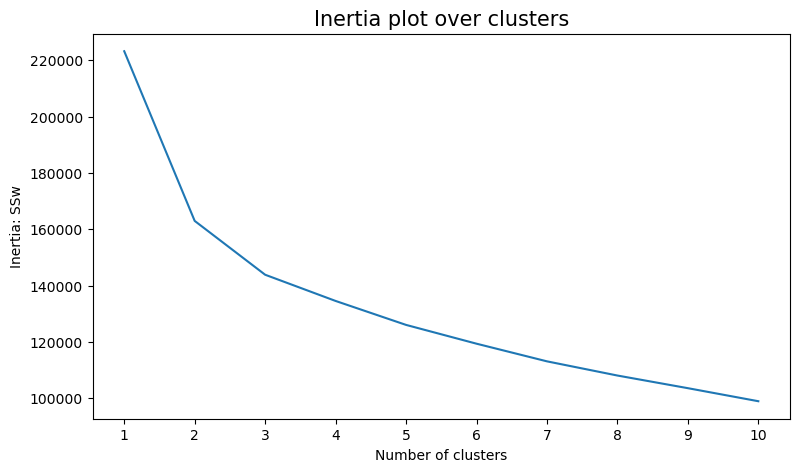

In [36]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5861695313859401
For n_clusters = 3, the average silhouette_score is : 0.4158750005709425
For n_clusters = 4, the average silhouette_score is : 0.2888677242144086
For n_clusters = 5, the average silhouette_score is : 0.2740484397491813
For n_clusters = 6, the average silhouette_score is : 0.1339630245480364
For n_clusters = 7, the average silhouette_score is : 0.14064766133560944
For n_clusters = 8, the average silhouette_score is : 0.1490087658193379
For n_clusters = 9, the average silhouette_score is : 0.15569774591354404
For n_clusters = 10, the average silhouette_score is : 0.16349611725867727


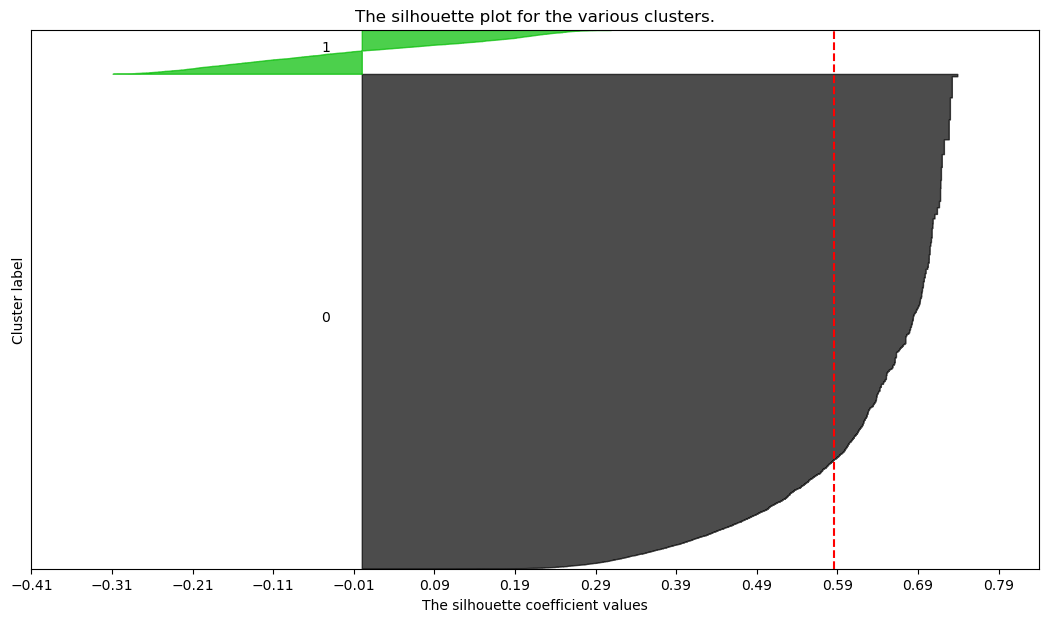

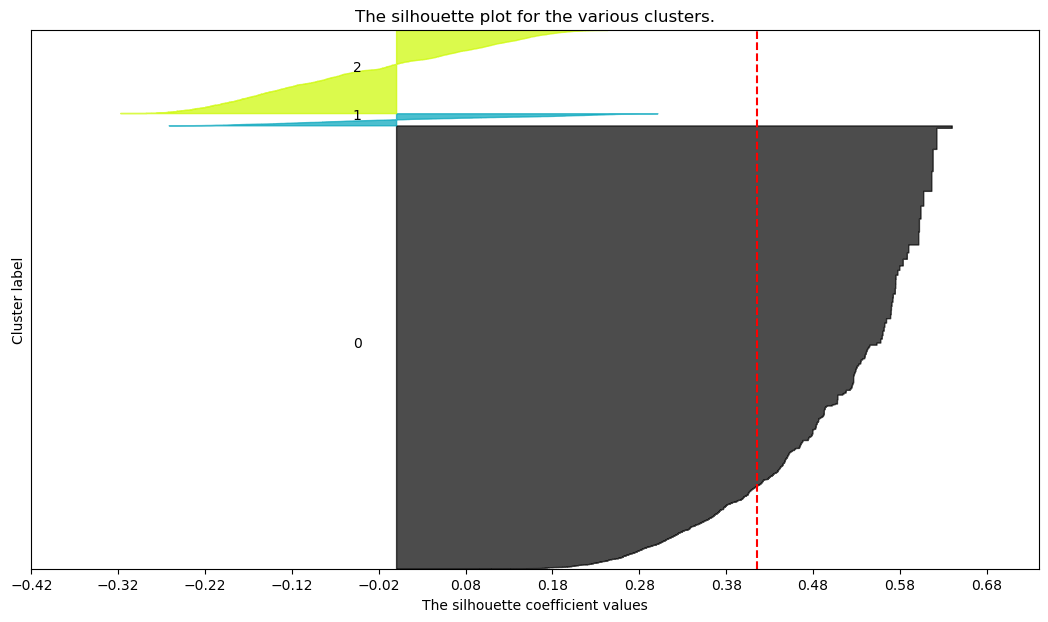

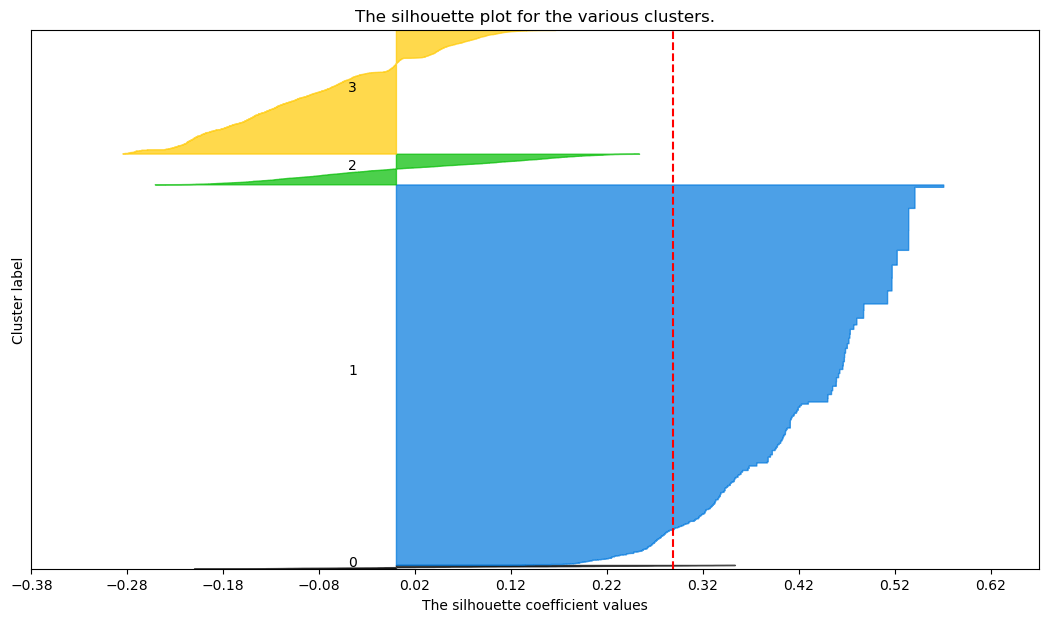

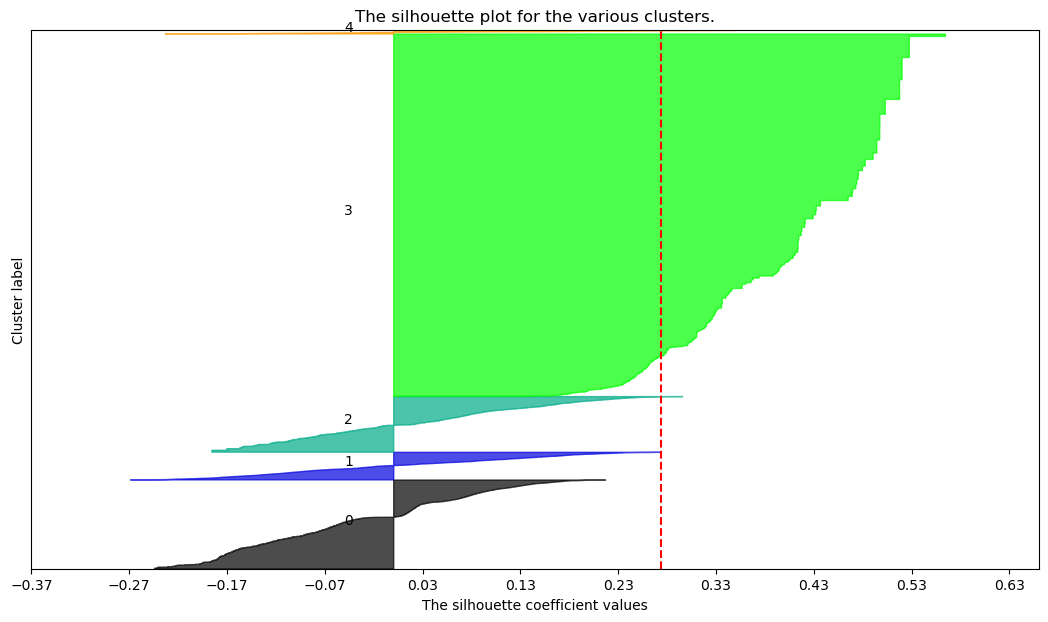

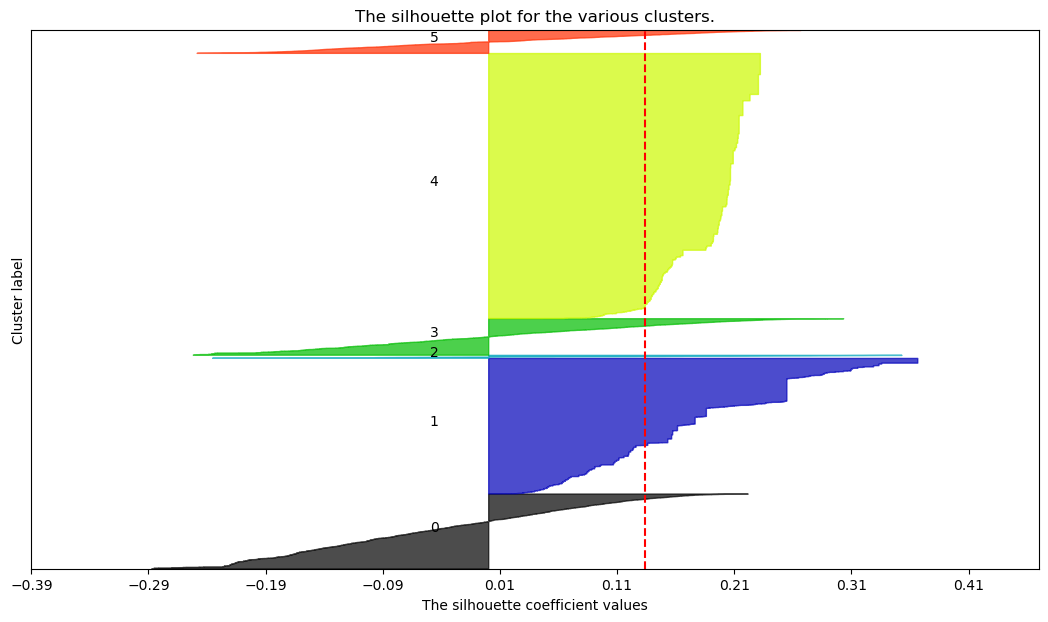

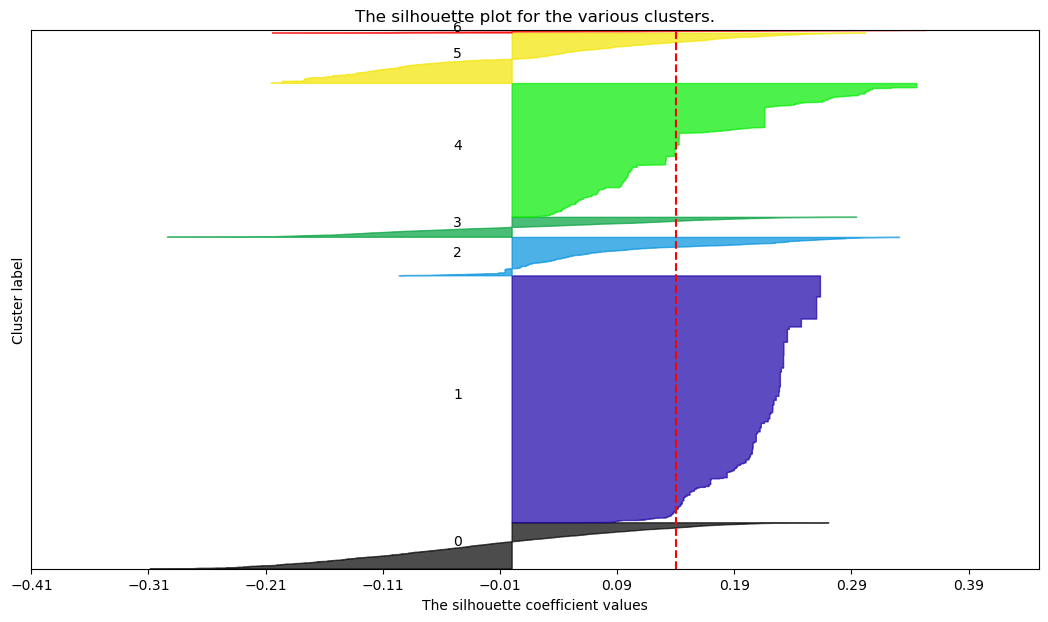

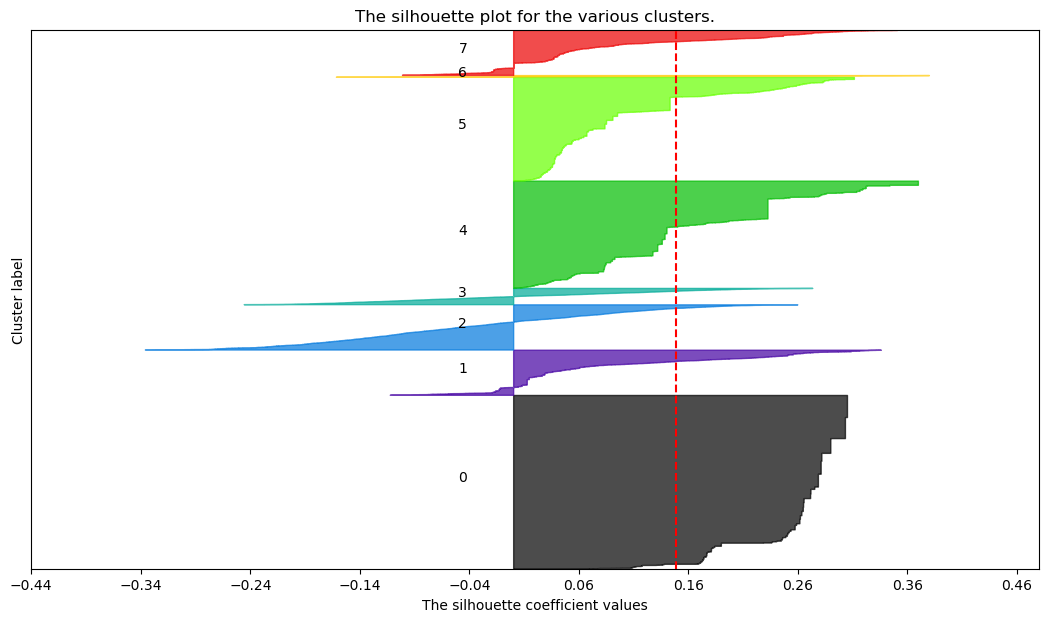

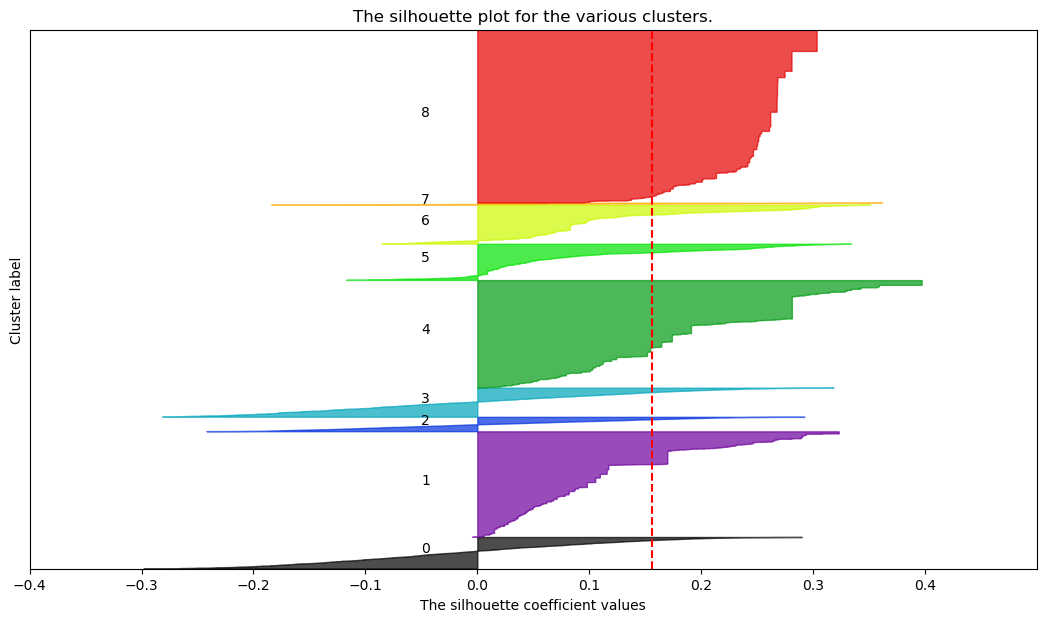

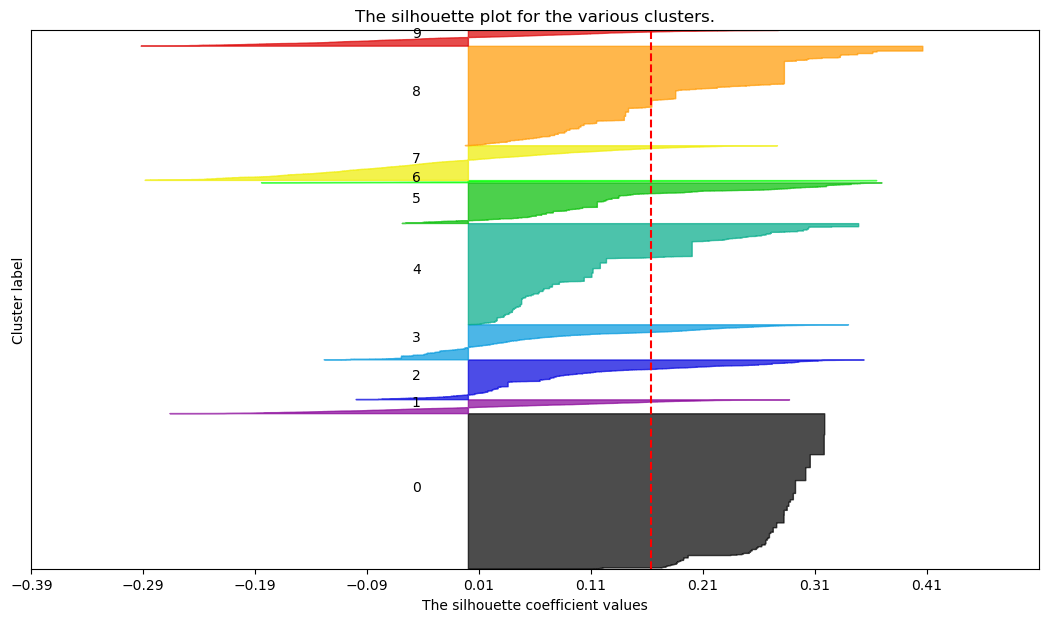

In [37]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(days_of_week_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(days_of_week_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(days_of_week_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [38]:
#K-means with K=2 for days of week columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0      -0.160676 -0.163241 -0.164652 -0.163392 -0.154428 -0.134694 -0.138765
1       1.812227  1.841163  1.857078  1.842868  1.741763  1.519188  1.565096

# Analysis: High spenders/ low spenders (not good for DOW)

In [39]:
#K-means with K=3 for days of week columns
kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0      -0.229371 -0.236676 -0.238207 -0.242195 -0.232911 -0.213677 -0.218832
1       3.359179  3.303737  3.295623  3.243018  3.077736  2.754673  2.808674
2       0.735634  0.782561  0.791890  0.820744  0.795210  0.739510  0.759154

# Analysis: High spenders/ low spenders /medium spenders (not good for DOW)

In [40]:
#K-means with K=4 for days of week columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(days_of_week_features)
km_labels = kmclust.fit_predict(days_of_week_features)

# Characterizing the final clusters
df_concat = pd.concat((days_of_week_features, pd.Series(km_labels, name='labels', index=days_of_week_features.index)), axis=1)
df_concat.groupby('labels').mean()

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5     DOW_6 
labels                                                                      
0       5.241424  5.131245  4.965175  4.793163  4.740289  4.321799  4.278882
1      -0.293047 -0.290940 -0.300237 -0.302111 -0.292900 -0.276047 -0.281215
2       1.702261  1.757165  1.810202  1.810430  1.670901  1.359513  1.413719
3       0.327719  0.310856  0.331152  0.341862  0.349593  0.386978  0.390705

# Analysis: High spenders/ low spenders /medium spenders/ very high spenders (not good for DOW)

# Weekend vs Weekday Orders

In [41]:
weekday_weekend_features = df_scaled_new[['weekend_orders', 'underweekend_orders']]

In [42]:
#K-means with weekday/weekend features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(weekday_weekend_features)
    inertia.append(kmclust.inertia_)  

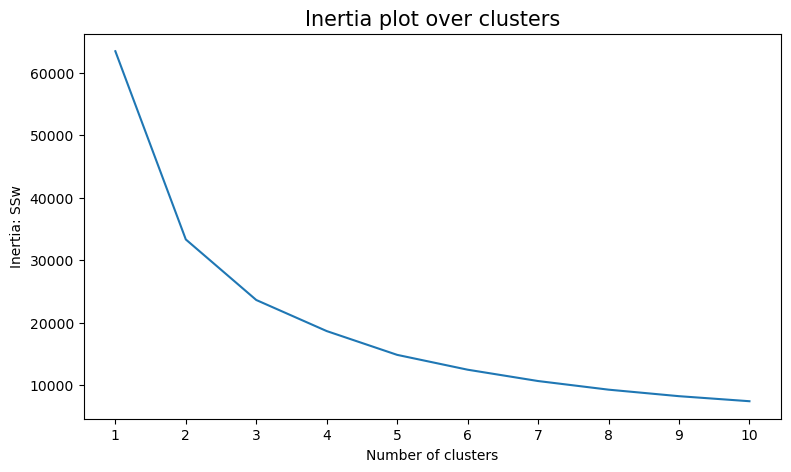

In [43]:
# The inertia plot for time of order features

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.7106220078231991
For n_clusters = 3, the average silhouette_score is : 0.5551103801446502
For n_clusters = 4, the average silhouette_score is : 0.47215419940267456
For n_clusters = 5, the average silhouette_score is : 0.49803295995700947
For n_clusters = 6, the average silhouette_score is : 0.459939518840112
For n_clusters = 7, the average silhouette_score is : 0.4776240733660288
For n_clusters = 8, the average silhouette_score is : 0.4813773937069052
For n_clusters = 9, the average silhouette_score is : 0.4873923466362438
For n_clusters = 10, the average silhouette_score is : 0.5049953619629514


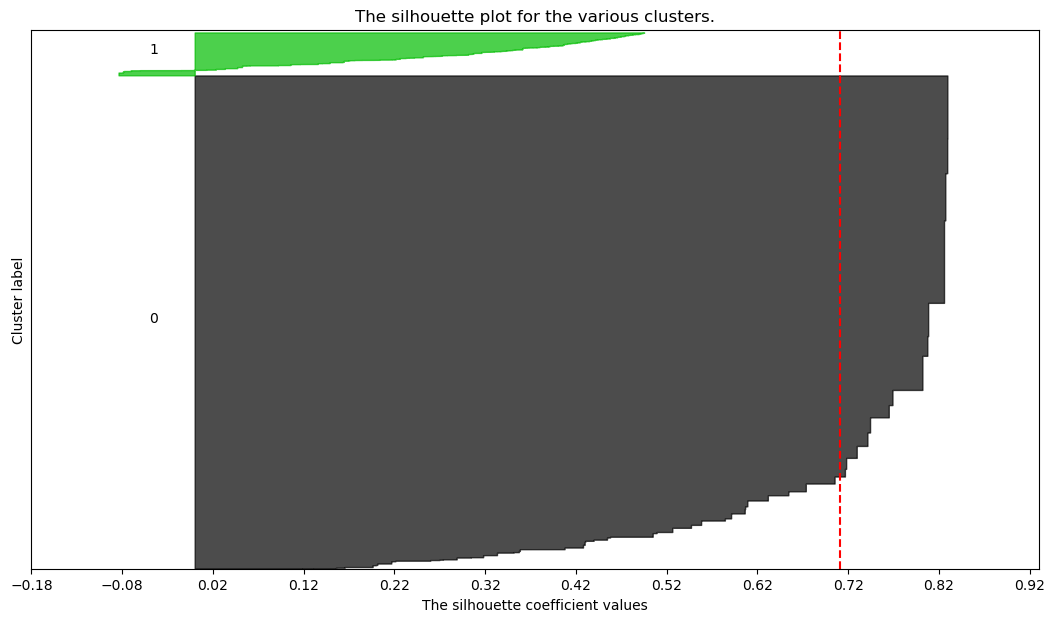

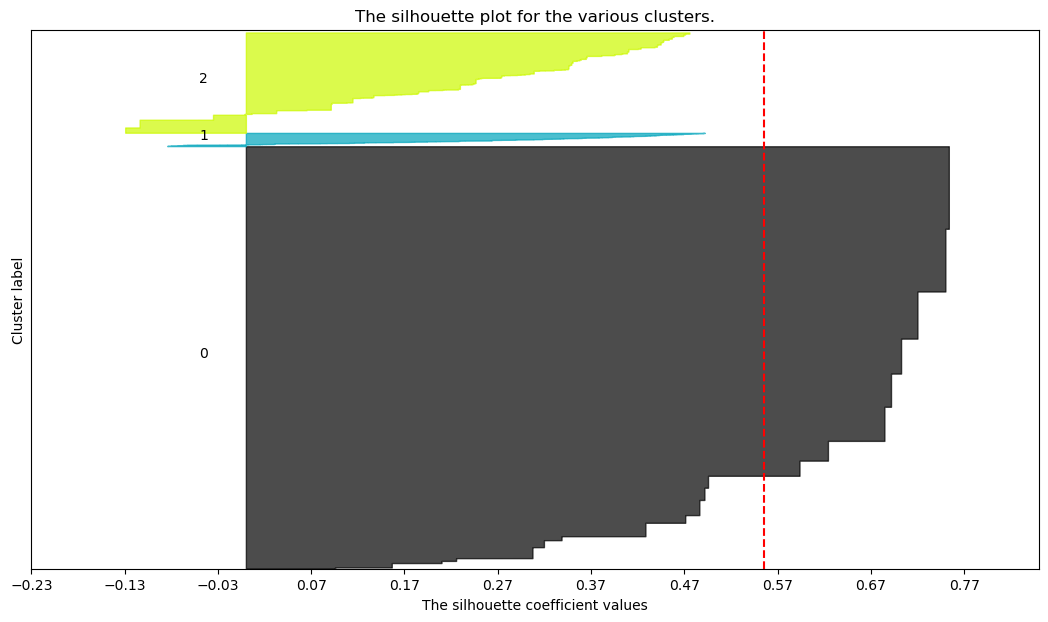

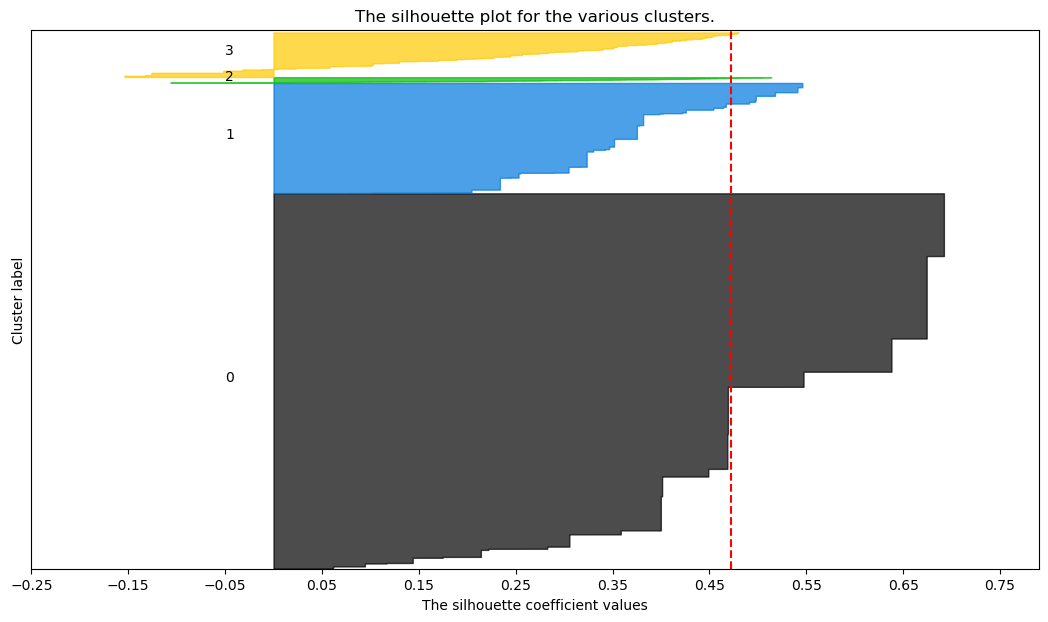

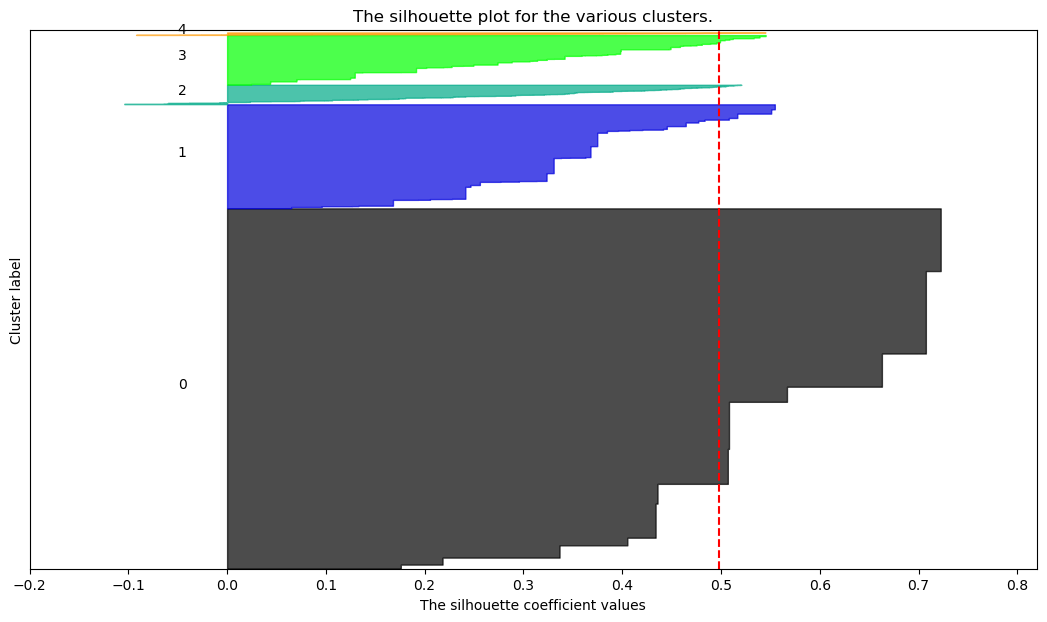

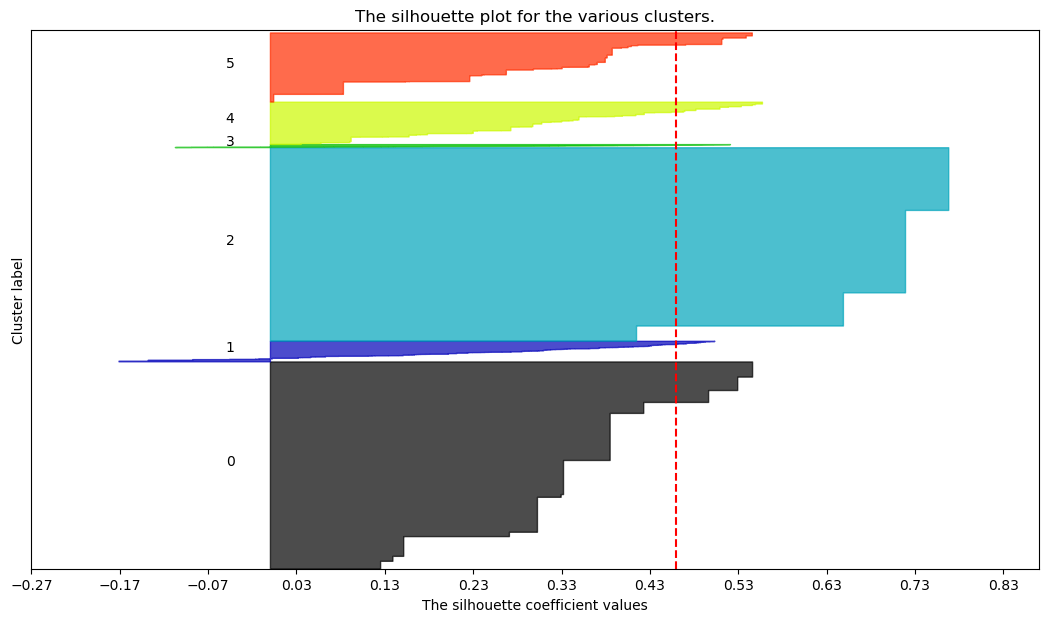

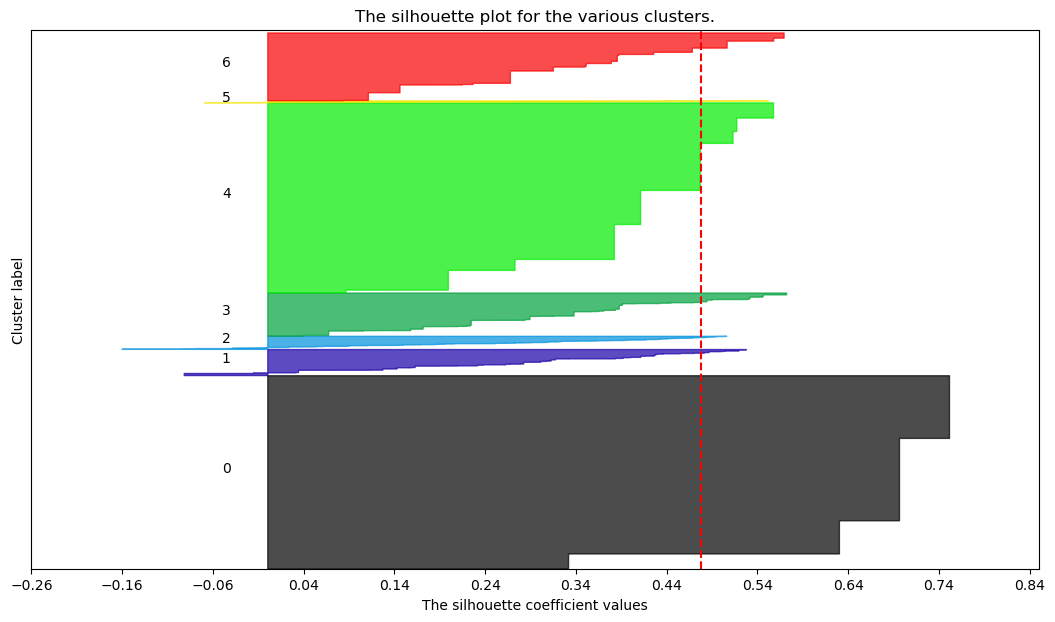

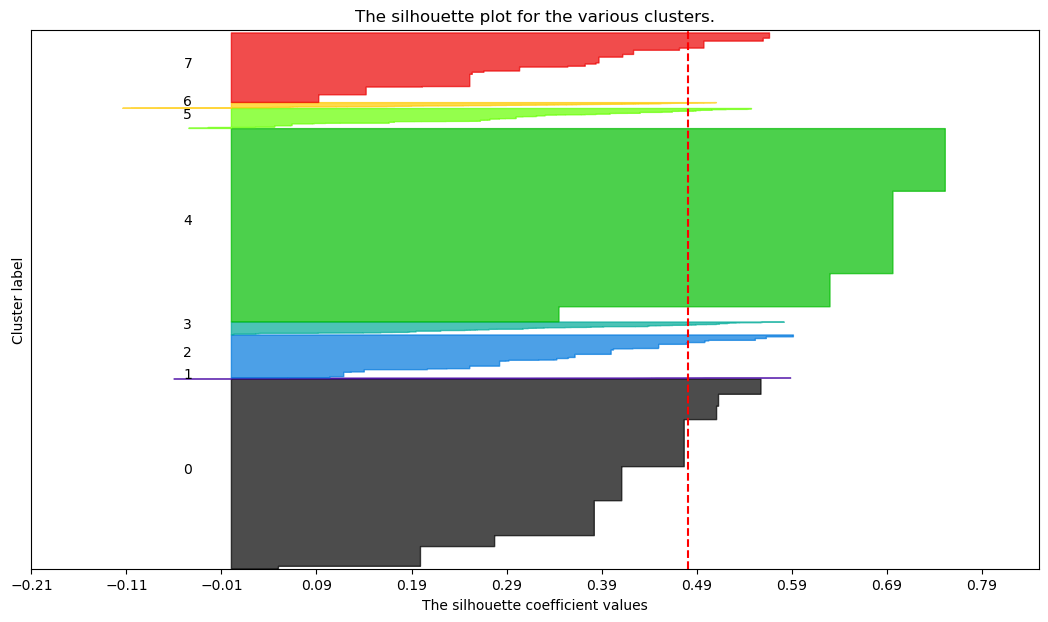

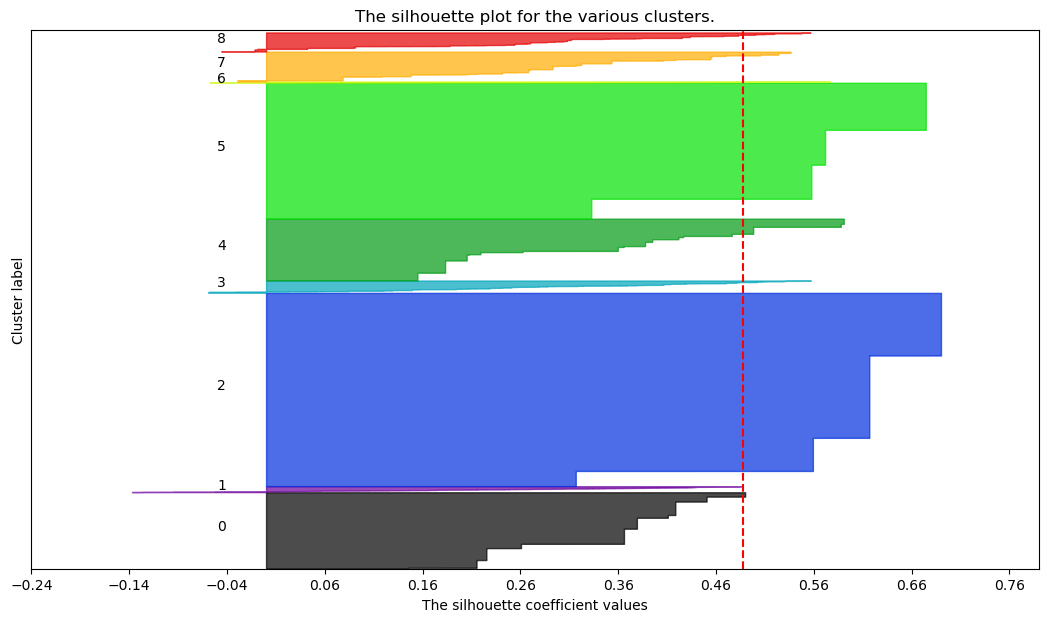

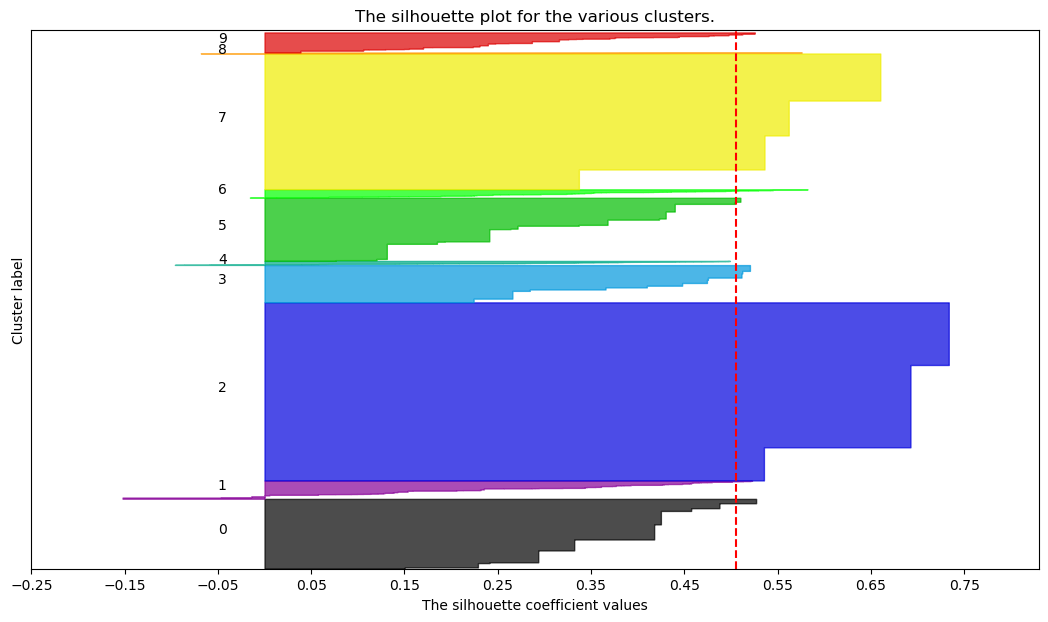

In [44]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(weekday_weekend_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(weekday_weekend_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(weekday_weekend_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [45]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(weekday_weekend_features)
km_labels = kmclust.fit_predict(weekday_weekend_features)

# Characterizing the final clusters
df_concat = pd.concat((weekday_weekend_features, pd.Series(km_labels, name='labels', index=weekday_weekend_features.index)), axis=1)
df_concat.groupby('labels').mean()

weekend_orders  underweekend_orders
labels                                     
0            -0.199228            -0.207090
1             2.292068             2.382517

# Analysis: low spenders, high spenders. Again, dow doesn't show major differences.

<a href="#Index">Back to Index</a>


# <a class='anchor' id='2.8.'></a>
># 2.8. Merge Time of Day and Order Volume


In [46]:
#K-means with K=4 for time of day columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(time_of_order_features)
time_of_day_labels = kmclust.fit_predict(time_of_order_features)

#K-means with K=4 for order volume columns
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(order_volume_features)
order_volume_labels = kmclust.fit_predict(order_volume_features)

In [47]:
pd.crosstab(time_of_day_labels, order_volume_labels)

col_0      0     1    2     3
row_0                        
0          1  1305  258   475
1        269   465   65   934
2      20891   250    0  5663
3        351   253   36   521

In [48]:
# Mapping clusters to descriptive labels
time_of_day_mapping = {0: 'Morning, Midday, Evening ', 1: 'Graveyard shift', 2: 'Low for All', 3: 'Night'}
order_volume_mapping = {0: 'Low Volume', 1: 'High Volume', 2: 'Medium Volume', 3: 'Very High Volume'}

# Replace labels with descriptions
time_of_day_labels_descriptive = [time_of_day_mapping[label] for label in time_of_day_labels]
order_volume_labels_descriptive = [order_volume_mapping[label] for label in order_volume_labels]

# Crosstab with descriptive labels
pd.crosstab(time_of_day_labels_descriptive, order_volume_labels_descriptive, 
            rownames=['Time of Day'], 
            colnames=['Order Volume'])


Order Volume               High Volume  Low Volume  Medium Volume  \
Time of Day                                                         
Graveyard shift                    465         269             65   
Low for All                        250       20891              0   
Morning, Midday, Evening          1305           1            258   
Night                              253         351             36   

Order Volume               Very High Volume  
Time of Day                                  
Graveyard shift                         934  
Low for All                            5663  
Morning, Midday, Evening                475  
Night                                   521

<a href="#Index">Back to Index</a>

# <a class='anchor' id='2.9.'></a>
# 2.9. Cluster Analysis
 **From ChatGPT (I think it is wrong about what 'Low for All' really is, but there is some good stuff here)**

2. Observations
Graveyard Shift:

Most orders during this period are in Medium Volume (984 orders) or Low Volume (323 orders), indicating sporadic demand.
Few orders are in High Volume (385) or Very High Volume (41), showing minimal large-scale activity.
Low for All:

Dominated by Low Volume orders (21,392), suggesting these hours are very quiet overall.
Minimal activity in other volume categories (e.g., 140 for High Volume and 5,272 for Medium Volume).
Morning, Midday, Evening:

A significant portion of orders falls into Low Volume (1,284), showing some downtime even during these periods.
Moderate presence in Medium Volume (535) and Very High Volume (220), reflecting meal-related peaks.
Night:

Moderate activity spread across Low Volume (382), Medium Volume (506), and High Volume (243), indicating a balanced order pattern.
Few Very High Volume orders (30), showing limited promotional or event-driven spikes.



3. Business Implications
Graveyard Shift:

Consider optimizing delivery operations for cost-efficiency during these hours (e.g., fewer drivers or consolidating deliveries).
Marketing campaigns targeting late-night users (e.g., discounts for night owls) could boost activity in High Volume or Very High Volume categories.
Low for All:

This cluster shows consistently low activity, possibly representing non-core operating hours.
Consider reducing operational overhead (e.g., fewer active drivers or limited service availability) to cut costs during these hours.
Morning, Midday, Evening:

These are peak business hours where Medium Volume and Very High Volume orders dominate. Focus on:
Ensuring sufficient delivery capacity (drivers, vehicles).
Enhancing promotions or partnerships with popular restaurants.
Minimizing delays, as higher activity could strain resources.
Night:

Reflects balanced activity with a healthy spread across volume categories. Recommendations include:
Targeted marketing for social or entertainment-driven orders.
Testing late-night-exclusive menu options or deals.




4. Actionable Strategies
Optimize Operational Hours:

Shift resources (e.g., drivers and promotions) toward peak periods like "Morning, Midday, Evening" and reduce focus on "Low for All."
Dynamic Pricing:

Introduce surge pricing during High Volume and Very High Volume periods to maximize profits.
Offer discounts during the "Graveyard Shift" to stimulate demand.
Segmented Marketing Campaigns:

Graveyard Shift: Focus on late-night workers and students with promotions.
Morning, Midday, Evening: Highlight popular meal combos or lunch deals.
Night: Promote desserts, snacks, or alcohol pairings.
Resource Allocation:

Use this analysis to adjust driver schedules, ensuring coverage aligns with peak demand and minimizes downtime costs.

<a href="#Index">Back to Index</a>

CLAUDE was used to generate following code


Creating merged segments...

Segment Distribution:
                       Segment  Count  Percentage
0  High Volume - Low Frequency  26099       82.24
1      Low Volume - Day Active   1842        5.80
2     High Volume - Night Owls   1025        3.23
3  High Volume - Night Focused    775        2.44
4      Low Volume - Night Owls    708        2.23
5   Low Volume - Low Frequency    705        2.22
6   Low Volume - Night Focused    386        1.22
7     High Volume - Day Active    197        0.62

Generating visualizations...


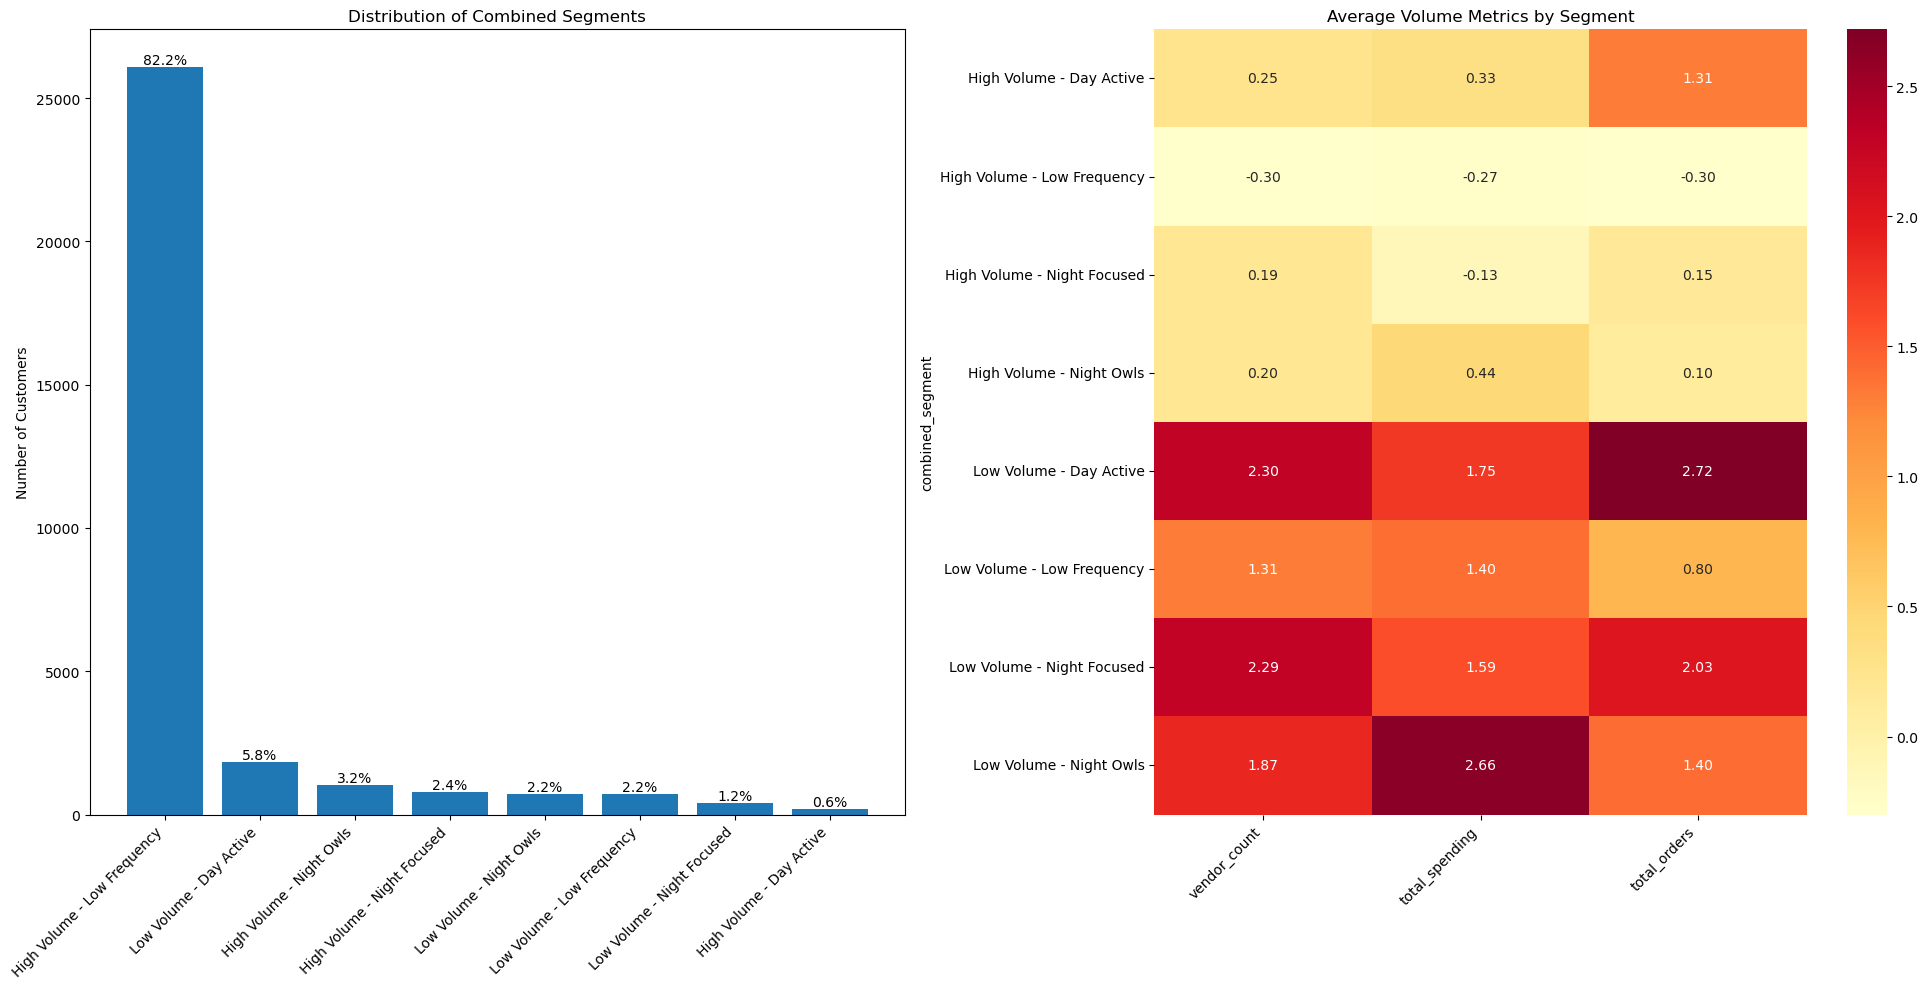

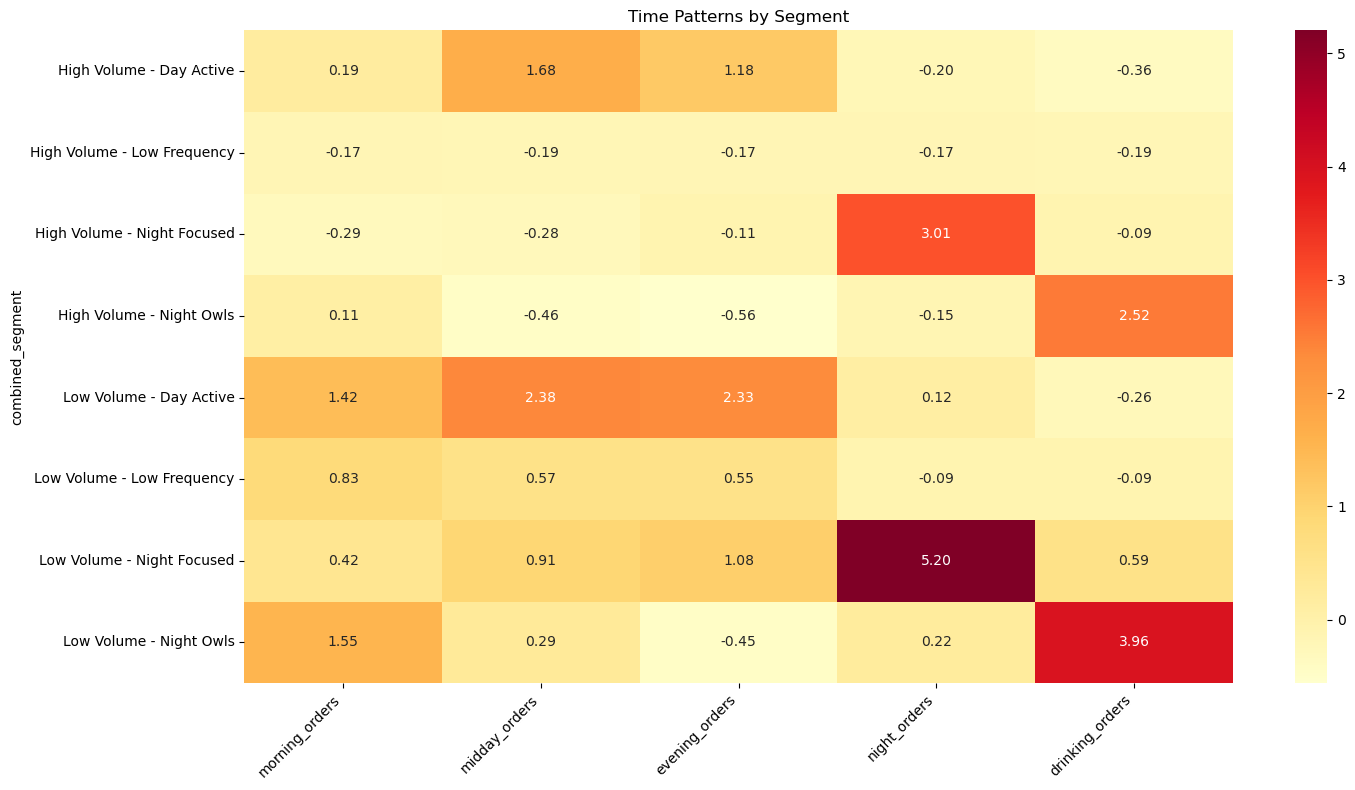


Generating detailed segment analysis...

Detailed Segment Analysis:

Segment: High Volume - Low Frequency
Number of customers: 26099 (82.2%)

Average metrics:
vendor_count: -0.30
total_spending: -0.27
total_orders: -0.30
morning_orders: -0.17
midday_orders: -0.19
evening_orders: -0.17
night_orders: -0.17
drinking_orders: -0.19
--------------------------------------------------------------------------------

Segment: High Volume - Night Focused
Number of customers: 775 (2.4%)

Average metrics:
vendor_count: 0.19
total_spending: -0.13
total_orders: 0.15
morning_orders: -0.29
midday_orders: -0.28
evening_orders: -0.11
night_orders: 3.01
drinking_orders: -0.09
--------------------------------------------------------------------------------

Segment: Low Volume - Low Frequency
Number of customers: 705 (2.2%)

Average metrics:
vendor_count: 1.31
total_spending: 1.40
total_orders: 0.80
morning_orders: 0.83
midday_orders: 0.57
evening_orders: 0.55
night_orders: -0.09
drinking_orders: -0.09
--

In [107]:
# First, recreate your time-based clustering
time_of_order_features = df_scaled_new[['morning_orders', 'midday_orders', 'evening_orders', 
                                      'night_orders', 'drinking_orders']]

# Create time-based clusters with k=4 as per your previous analysis
kmclust_time = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
time_labels = kmclust_time.fit_predict(time_of_order_features)

# Your existing volume-based clustering
order_volume_features = df_scaled_new[['vendor_count', 'total_spending', 'total_orders']]
kmclust_volume = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
volume_labels = kmclust_volume.fit_predict(order_volume_features)

def create_merged_segments(df, volume_labels, time_labels):
    """
    Creates merged segments from volume and time clusters.
    Uses your existing cluster assignments to create meaningful combined segments.
    """
    # Create a copy of the dataframe to avoid warnings
    df = df.copy()
    
    # Add cluster labels
    df['volume_segment'] = volume_labels
    df['time_segment'] = time_labels
    
    # Create descriptive labels for volume segments
    volume_names = {
        0: 'Low Volume',    # Your cluster with negative means
        1: 'High Volume'    # Your cluster with positive means
    }
    
    # Create descriptive labels for time segments based on your analysis
    time_names = {
        0: 'Day Active',
        1: 'Night Owls',
        2: 'Low Frequency',
        3: 'Night Focused'
    }
    
    # Map the numeric labels to descriptive names
    df['volume_segment'] = df['volume_segment'].map(volume_names)
    df['time_segment'] = df['time_segment'].map(time_names)
    
    # Create combined segment labels
    df['combined_segment'] = df['volume_segment'] + ' - ' + df['time_segment']
    
    # Calculate segment counts and percentages
    segment_counts = df['combined_segment'].value_counts().reset_index()
    segment_counts.columns = ['Segment', 'Count']
    segment_counts['Percentage'] = (segment_counts['Count'] / len(df) * 100).round(2)
    
    return df, segment_counts

def plot_merged_segments(df, segment_counts):
    """
    Creates comprehensive visualizations for the merged segments.
    Shows distribution and characteristics of each combined segment.
    """
    # Create figure for segment distribution
    plt.figure(figsize=(20, 10))
    
    # Plot 1: Segment size distribution
    plt.subplot(1, 2, 1)
    bars = plt.bar(segment_counts['Segment'], segment_counts['Count'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Combined Segments')
    plt.ylabel('Number of Customers')
    
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height/len(df)*100:.1f}%',
                ha='center', va='bottom')
    
    # Plot 2: Volume metrics by segment
    plt.subplot(1, 2, 2)
    volume_metrics = ['vendor_count', 'total_spending', 'total_orders']
    segment_means = df.groupby('combined_segment')[volume_metrics].mean()
    
    sns.heatmap(segment_means, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Average Volume Metrics by Segment')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot for time patterns
    plt.figure(figsize=(15, 8))
    time_cols = ['morning_orders', 'midday_orders', 'evening_orders', 
                 'night_orders', 'drinking_orders']
    
    time_patterns = df.groupby('combined_segment')[time_cols].mean()
    sns.heatmap(time_patterns, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Time Patterns by Segment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def analyze_segments(df):
    """
    Provides detailed statistical analysis for each combined segment.
    """
    segments = df['combined_segment'].unique()
    metrics = ['vendor_count', 'total_spending', 'total_orders', 
              'morning_orders', 'midday_orders', 'evening_orders', 
              'night_orders', 'drinking_orders']
    
    print("\nDetailed Segment Analysis:")
    print("=" * 80)
    
    for segment in segments:
        segment_data = df[df['combined_segment'] == segment]
        print(f"\nSegment: {segment}")
        print(f"Number of customers: {len(segment_data)} ({len(segment_data)/len(df)*100:.1f}%)")
        print("\nAverage metrics:")
        for metric in metrics:
            print(f"{metric}: {segment_data[metric].mean():.2f}")
        print("-" * 80)

# Execute the analysis
print("Creating merged segments...")
merged_df, segment_counts = create_merged_segments(df_scaled_new, volume_labels, time_labels)

print("\nSegment Distribution:")
print(segment_counts)

print("\nGenerating visualizations...")
plot_merged_segments(merged_df, segment_counts)

print("\nGenerating detailed segment analysis...")
analyze_segments(merged_df)

Claude:
Segment Analysis by Volume and Time Patterns:

1. High Volume - Low Frequency (82.24% of customers)
Looking deeper at the metrics:
- The consistent negative values (-0.17 to -0.30) across all metrics suggest these customers have established but minimal ordering patterns
- Their ordering behavior shows remarkable consistency across time periods, indicating they don't have strong time preferences
- The combination of high volume classification but low frequency behavior suggests these might be customers who made several orders initially but haven't maintained that pace
- Key insight: This segment represents your greatest opportunity for growth, as even a small increase in engagement could have massive impact due to their large numbers

2. Low Volume - Day Active (5.80% of customers)
The metrics tell an interesting story:
- Their vendor count (2.30) combined with high total orders (2.72) suggests these customers are both exploratory and loyal
- The progression of their daytime activity (morning: 1.42 → midday: 2.38 → evening: 2.33) shows a clear work-day pattern
- The slightly positive night orders (0.12) but negative drinking orders (-0.26) suggests they occasionally order dinner but rarely late night
- Key insight: These customers are likely professionals or businesses with predictable ordering patterns and high value potential

3. High Volume - Night Owls (3.23% of customers)
Examining the timing patterns:
- Morning activity is slightly positive (0.11) while evening is strongly negative (-0.56)
- The dramatic spike in drinking hours (2.52) combined with negative evening orders suggests these customers start ordering late and continue into early morning
- Their moderate volume metrics (vendor_count: 0.20, total_spending: 0.44) indicate they're loyal to specific vendors during their preferred hours
- Key insight: This segment might represent entertainment industry workers or venues with very specific operational hours

4. Low Volume - Night Focused (1.22% of customers)
The metrics reveal a fascinating pattern:
- Extremely high night orders (5.20) - the highest intensity of any metric in any segment
- Relatively high vendor count (2.29) and total orders (2.03) despite being "low volume"
- Progressive increase in activity throughout the day (morning: 0.42 → midday: 0.91 → evening: 1.08)
- Key insight: These could be businesses that operate primarily at night, like hotels or late-night entertainment venues

Cross-Pattern Analysis:

1. Volume vs. Time Correlation
- Interesting paradox: "High Volume" segments often show lower actual order volumes than "Low Volume" segments
- This suggests the initial volume classification might be capturing something different than pure order quantity
- The time patterns seem to be stronger predictors of actual ordering behavior than the volume classification

2. Temporal Progression Patterns
Morning → Midday → Evening progression shows three main patterns:
- Increasing (Day Active segments)
- Decreasing (Night Owls)
- Spike pattern (Night Focused)

3. Value Indicators
Looking at total_spending relative to total_orders:
- Low Volume - Night Owls show the highest spending efficiency (spending: 2.66 vs orders: 1.40)
- High Volume - Day Active show balanced metrics (spending: 0.33 vs orders: 1.31)
- This suggests different price sensitivities across segments

Strategic Implications:

1. Customer Journey Optimization
- Create segment-specific onboarding experiences
- Develop targeted retention strategies for each segment
- Focus on moving customers from the majority segment into higher-value segments

2. Operational Excellence
- Staff optimization based on segment-specific peak times
- Vendor relationship management focusing on segment preferences
- Inventory and delivery capacity planning aligned with temporal patterns

3. Marketing and Promotion Strategy
For each segment:

High Volume - Low Frequency (82.24%):
- Focus on reactivation campaigns
- Introduce variety in ordering options
- Create "discovery" promotions to increase engagement

Low Volume - Day Active (5.80%):
- Business lunch packages
- Corporate account programs
- Catering services promotion

High Volume - Night Owls (3.23%):
- Late-night exclusive menus
- Special after-hours promotions
- Partnership with entertainment venues

Low Volume - Night Focused (1.22%):
- Premium night delivery service
- Special night menu options
- 24/7 customer support

4. Growth Opportunities:

Vertical Growth:
- Increase order frequency in the majority segment
- Expand average order value in high-spending segments
- Develop loyalty programs aligned with segment behaviors

Horizontal Growth:
- Target similar businesses/customers within each segment
- Expand service offerings based on segment-specific needs
- Create cross-segment promotion strategies


<a href="#Index">Back to Index</a>

# <a class='anchor' id='3.'></a>
># 3. Age Perspective

In [119]:
age_order_volume = df_scaled_new[['customer_age', 'total_spending', 'total_orders']]

In [120]:
#K-means with order_volume features finding the best number of clusters
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=42)
    kmclust.fit(age_order_volume)
    inertia.append(kmclust.inertia_)  

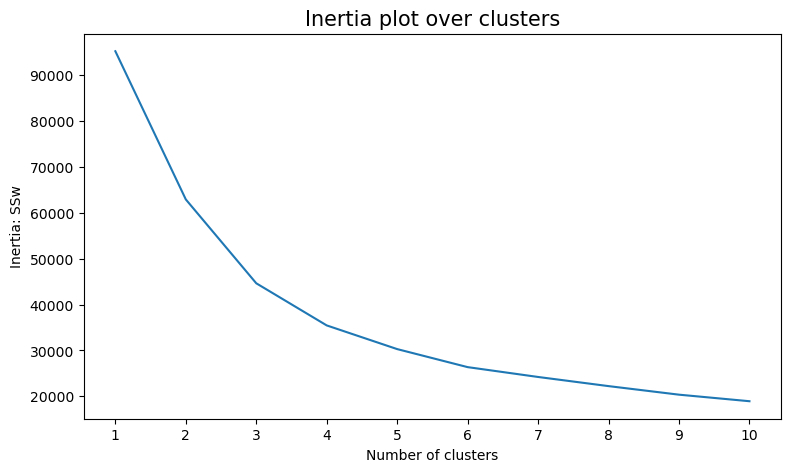

In [121]:

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.593417434898719
For n_clusters = 3, the average silhouette_score is : 0.4199902008621633
For n_clusters = 4, the average silhouette_score is : 0.44144320109952606
For n_clusters = 5, the average silhouette_score is : 0.3375393785741815
For n_clusters = 6, the average silhouette_score is : 0.34459615560884727
For n_clusters = 7, the average silhouette_score is : 0.35673738850811165
For n_clusters = 8, the average silhouette_score is : 0.30952779258178725
For n_clusters = 9, the average silhouette_score is : 0.3129984604317173
For n_clusters = 10, the average silhouette_score is : 0.32270019344459483


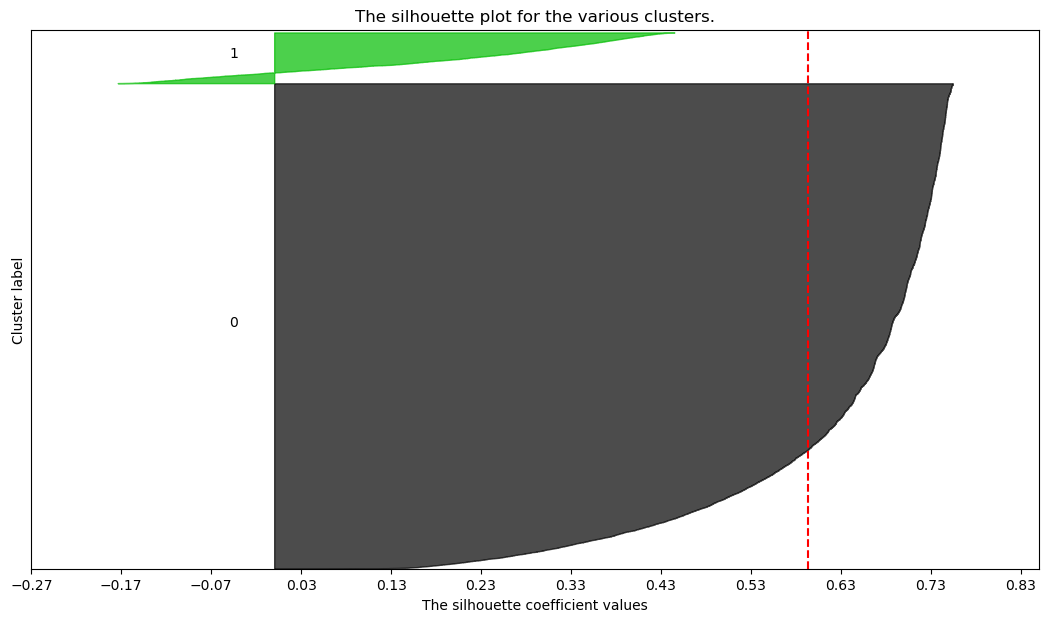

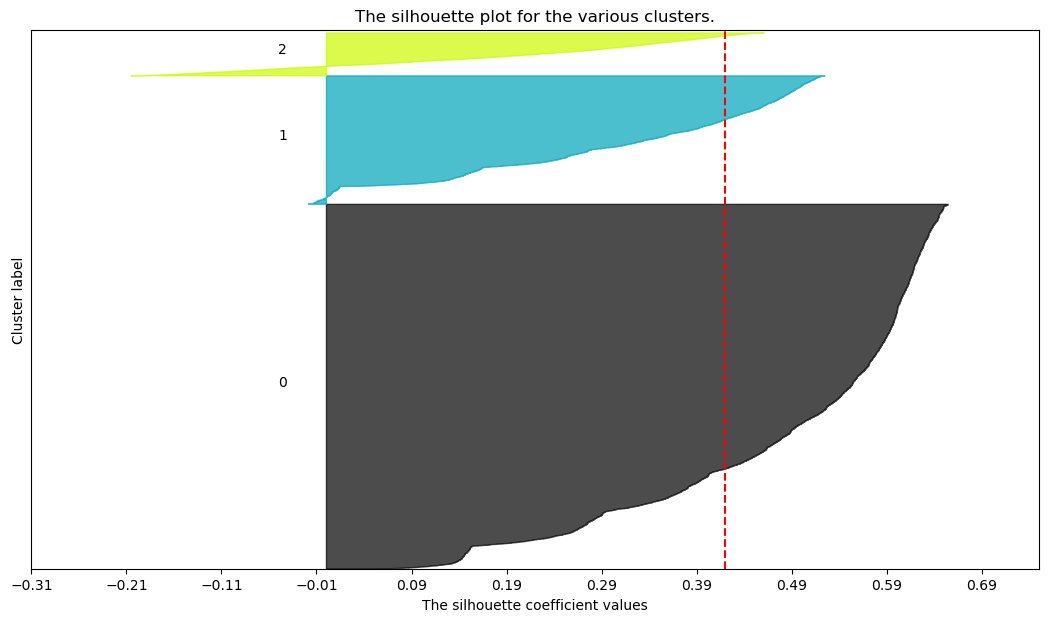

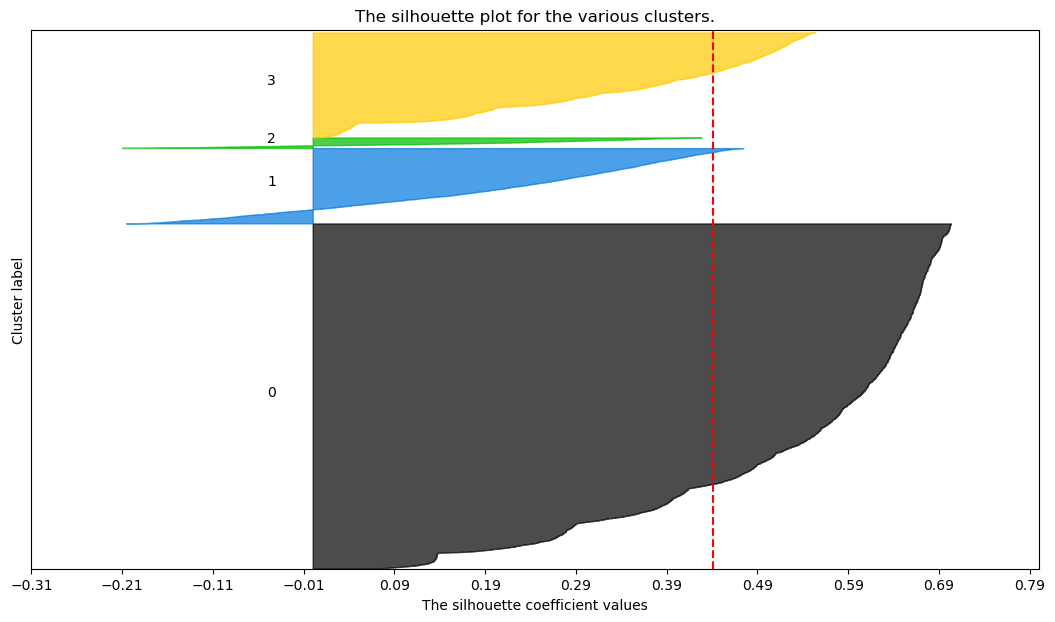

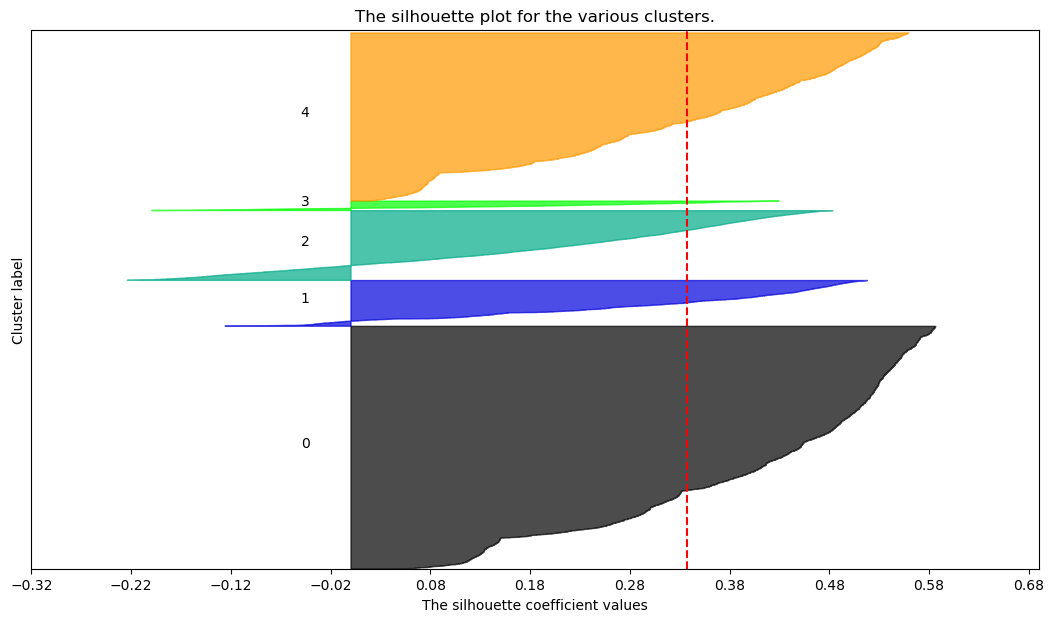

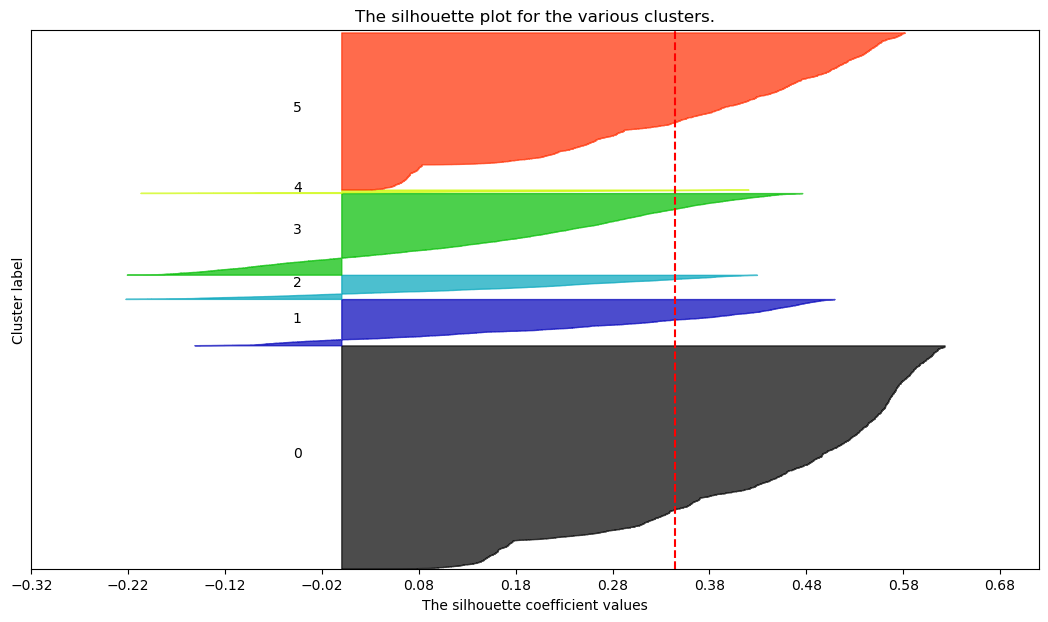

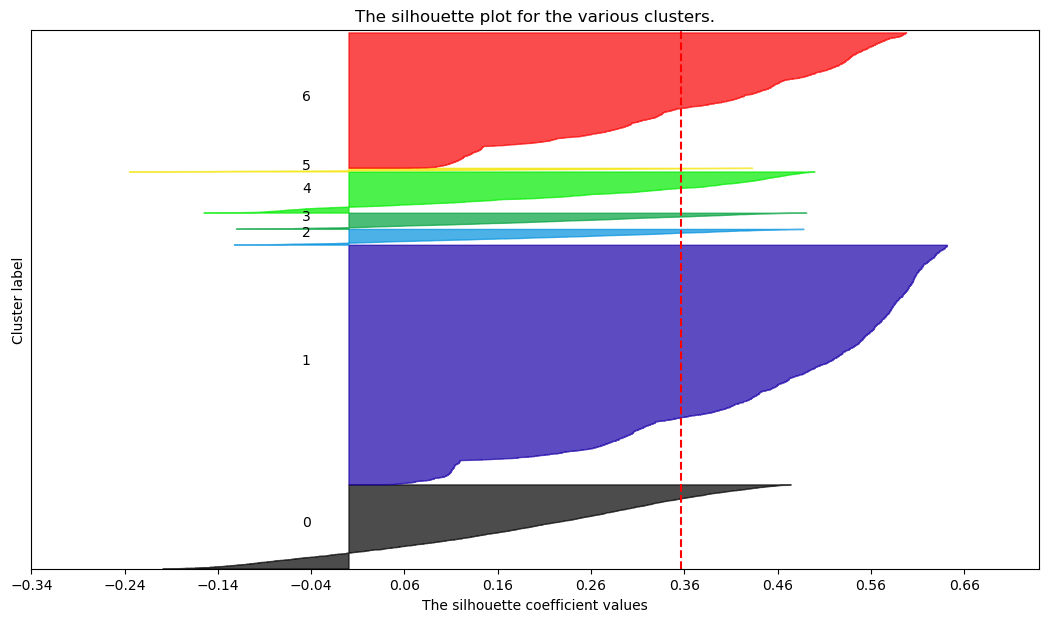

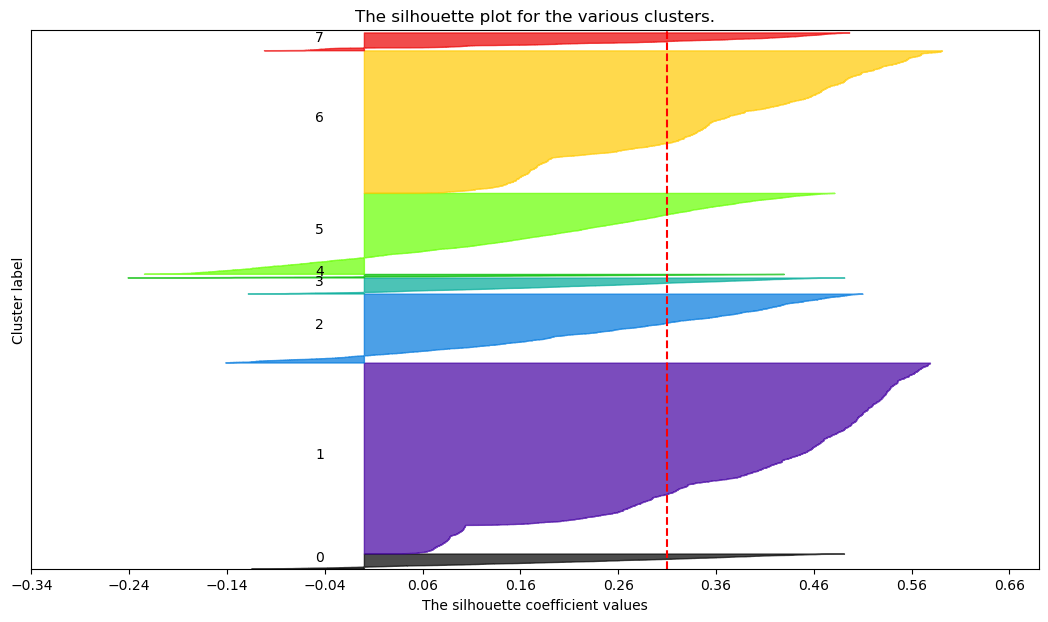

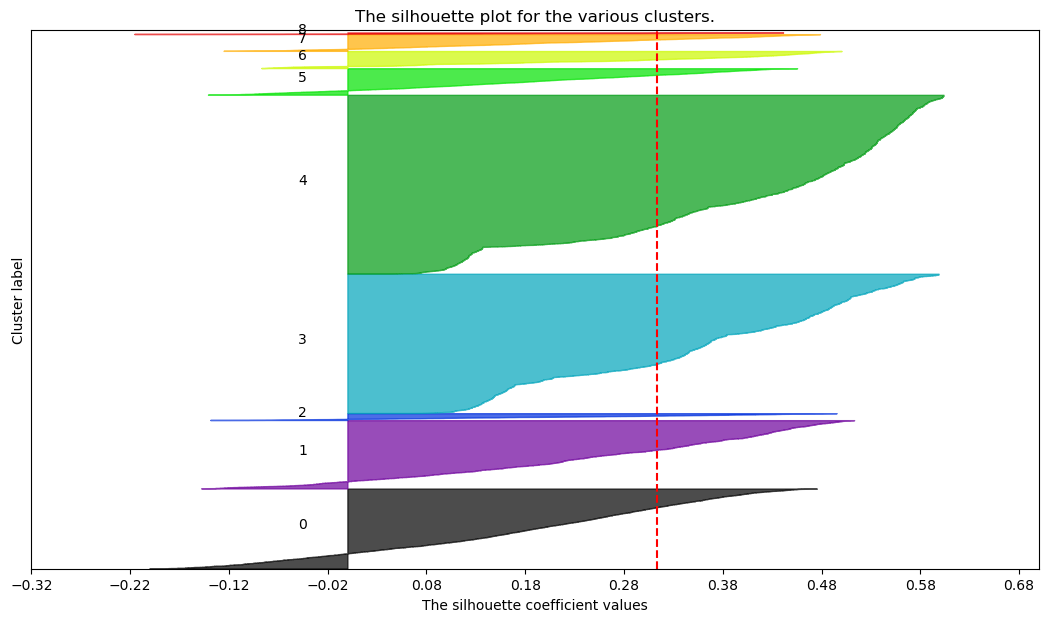

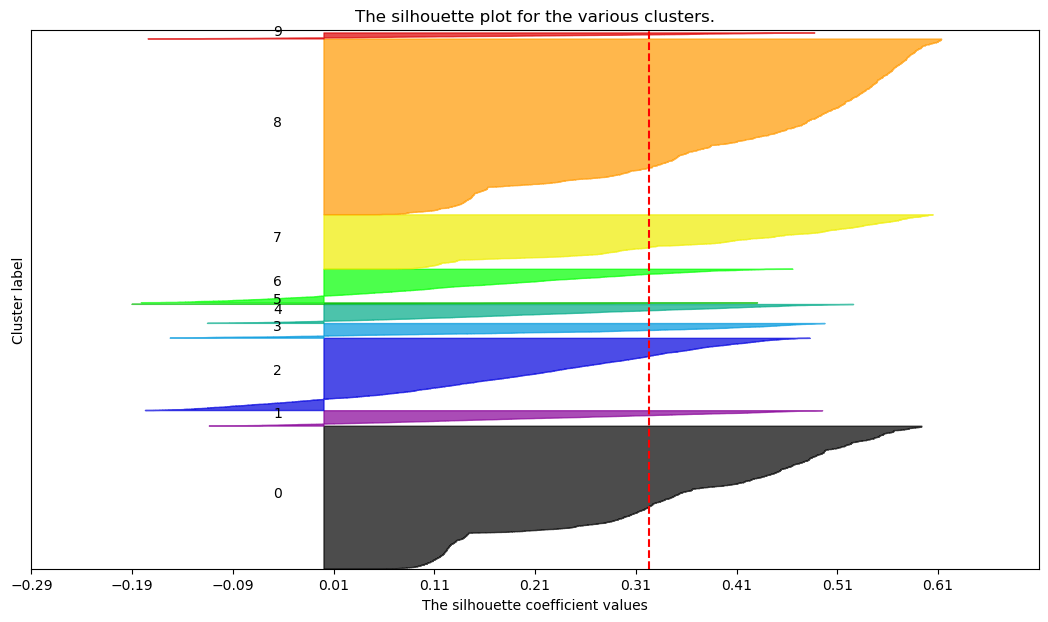

In [122]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric for time of order features
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(age_order_volume)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(age_order_volume, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(age_order_volume, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_scaled_original) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [67]:
#K-means with K=2 for weekday_weekend columns
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=15, random_state=1)
kmclust.fit(age_order_volume)
km_labels = kmclust.fit_predict(age_order_volume)

# Characterizing the final clusters
df_concat = pd.concat((age_order_volume, pd.Series(km_labels, name='labels', index=age_order_volume.index)), axis=1)
df_concat.groupby('labels').mean()

customer_age  total_spending  total_orders
labels                                            
0          -0.002738       -0.230014     -0.231103
1           0.026208        2.201682      2.212104

<a href="#Index">Back to Index</a>

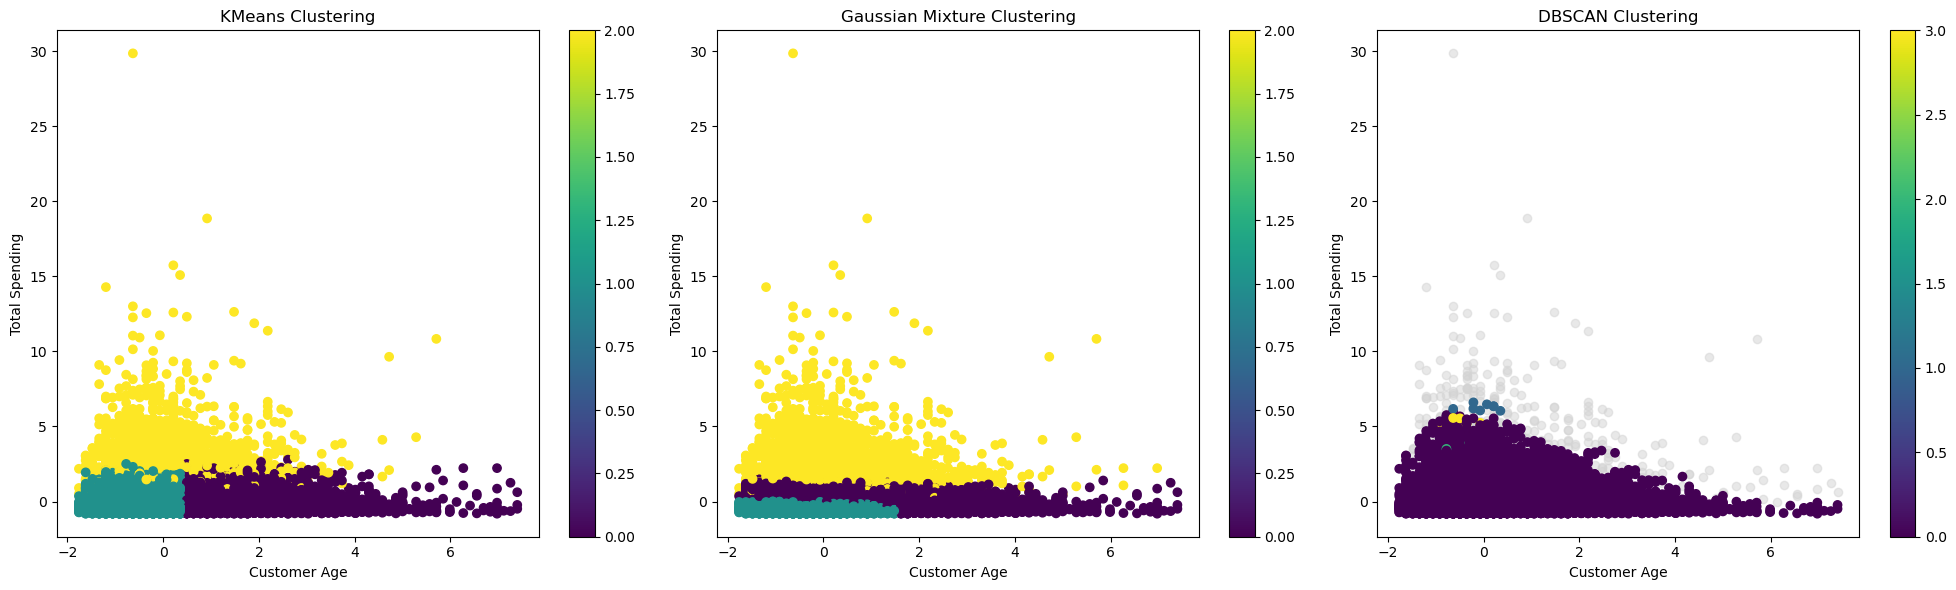

Clustering Performance Metrics:

Silhouette Scores:
KMeans: 0.420
GMM: 0.245
DBSCAN: 0.728

Cluster Sizes:
KMeans: [ 7602 21603  2532]
GMM: [11175 17039  3523]
DBSCAN: [31393     8     9     8] (Noise points: 319)

KMeans Cluster Characteristics:

Cluster 0:
Size: 7602 customers
Average age: 1.3
Average spending: -0.19
Average orders: -0.19

Cluster 1:
Size: 21603 customers
Average age: -0.5
Average spending: -0.22
Average orders: -0.22

Cluster 2:
Size: 2532 customers
Average age: -0.1
Average spending: 2.41
Average orders: 2.41

GMM Cluster Characteristics:

Cluster 0:
Size: 11175 customers
Average age: 0.4
Average spending: 0.09
Average orders: 0.08

Cluster 1:
Size: 17039 customers
Average age: -0.3
Average spending: -0.47
Average orders: -0.47

Cluster 2:
Size: 3523 customers
Average age: 0.1
Average spending: 1.99
Average orders: 2.00

DBSCAN Cluster Characteristics:

Cluster 0:
Size: 31393 customers
Average age: -0.0
Average spending: -0.05
Average orders: -0.05

Cluster 1:
Size

In [125]:
# Initialize our clustering algorithms with appropriate parameters
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters for more nuanced age groups
gmm = GaussianMixture(n_components=3, random_state=42)  # Matching KMeans clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjusted for your data scale

# Fit each algorithm and get cluster labels
kmeans_labels = kmeans.fit_predict(age_order_volume)
gmm_labels = gmm.fit_predict(age_order_volume)
dbscan_labels = dbscan.fit_predict(age_order_volume)

# Create figure with three subplots for comparing methods
fig, axs = plt.subplots(1, 3, figsize=(20,6))

# Function to create scatter plots with consistent styling
def plot_clusters(ax, x, y, labels, title, noise_mask=None):
    if noise_mask is not None:
        # Plot noise points first (if DBSCAN)
        ax.scatter(x[~noise_mask], y[~noise_mask], 
                  c='lightgray', label='Noise', alpha=0.5)
        # Plot clustered points
        scatter = ax.scatter(x[noise_mask], y[noise_mask], 
                           c=labels[noise_mask], cmap='viridis')
    else:
        # Plot all points for KMeans and GMM
        scatter = ax.scatter(x, y, c=labels, cmap='viridis')
    
    ax.set_title(f'{title} Clustering')
    ax.set_xlabel('Customer Age')
    ax.set_ylabel('Total Spending')
    return scatter

# Plot KMeans results
scatter_kmeans = plot_clusters(axs[0], 
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             kmeans_labels, 
                             'KMeans')

# Plot GMM results
scatter_gmm = plot_clusters(axs[1],
                          age_order_volume['customer_age'],
                          age_order_volume['total_spending'],
                          gmm_labels,
                          'Gaussian Mixture')

# Plot DBSCAN results
mask = dbscan_labels != -1
scatter_dbscan = plot_clusters(axs[2],
                             age_order_volume['customer_age'],
                             age_order_volume['total_spending'],
                             dbscan_labels,
                             'DBSCAN',
                             mask)

# Add colorbars
for ax, scatter in zip(axs, [scatter_kmeans, scatter_gmm, scatter_dbscan]):
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

# Calculate and print clustering metrics
print("Clustering Performance Metrics:\n" + "="*30)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(age_order_volume, kmeans_labels)
gmm_silhouette = silhouette_score(age_order_volume, gmm_labels)
dbscan_silhouette = silhouette_score(age_order_volume[mask], dbscan_labels[mask]) if mask.any() else 0

print(f"\nSilhouette Scores:")
print(f"KMeans: {kmeans_silhouette:.3f}")
print(f"GMM: {gmm_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

# Print cluster sizes
print(f"\nCluster Sizes:")
print(f"KMeans: {np.bincount(kmeans_labels)}")
print(f"GMM: {np.bincount(gmm_labels)}")
print(f"DBSCAN: {np.bincount(dbscan_labels[mask])} (Noise points: {(~mask).sum()})")

# Analyze cluster characteristics
def analyze_clusters(data, labels, method_name):
    print(f"\n{method_name} Cluster Characteristics:")
    for cluster in range(labels.max() + 1):
        cluster_data = data[labels == cluster]
        print(f"\nCluster {cluster}:")
        print(f"Size: {len(cluster_data)} customers")
        print(f"Average age: {cluster_data['customer_age'].mean():.1f}")
        print(f"Average spending: {cluster_data['total_spending'].mean():.2f}")
        print(f"Average orders: {cluster_data['total_orders'].mean():.2f}")

# Analyze each clustering method
analyze_clusters(age_order_volume, kmeans_labels, "KMeans")
analyze_clusters(age_order_volume, gmm_labels, "GMM")
if mask.any():
    analyze_clusters(age_order_volume[mask], dbscan_labels[mask], "DBSCAN")

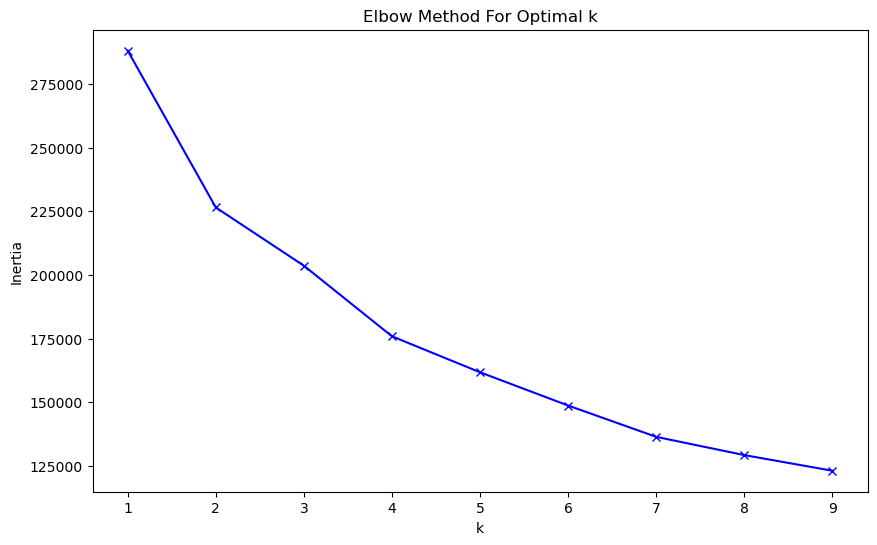

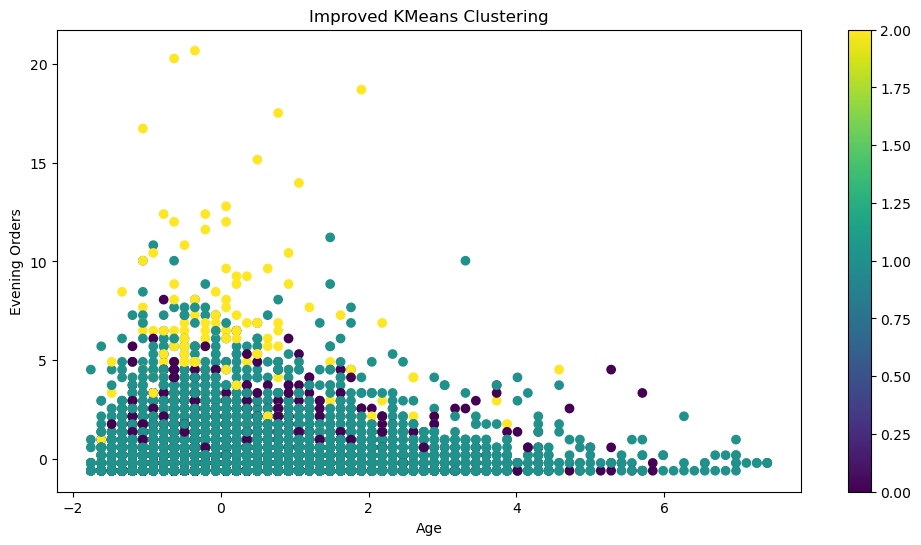


Cluster 0 Profile:
Size: 5390
Average Age: 0.0
Average Evening Orders: -0.1
Peak Order Time: morning_orders

Cluster 1 Profile:
Size: 25805
Average Age: -0.0
Average Evening Orders: -0.0
Peak Order Time: midday_orders

Cluster 2 Profile:
Size: 542
Average Age: -0.1
Average Evening Orders: 2.3
Peak Order Time: morning_orders


In [47]:
# Improved KMeans implementation
# Use RobustScaler to handle outliers better
scaler = RobustScaler()
scaled_features = scaler.fit_transform(scaled_age_time)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
scaled_pca = pca.fit_transform(scaled_features)

# Find optimal clusters using elbow method
inertias = []
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(scaled_pca)
   inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Final KMeans with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_pca)

# Visualize results
plt.figure(figsize=(12,6))
scatter = plt.scatter(scaled_age_time['customer_age'], 
                    scaled_age_time['evening_orders'],
                    c=clusters, 
                    cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Age')
plt.ylabel('Evening Orders')
plt.title('Improved KMeans Clustering')
plt.show()

# Analyze clusters
for i in range(3):
   cluster_data = scaled_age_time[clusters == i]
   print(f"\nCluster {i} Profile:")
   print(f"Size: {len(cluster_data)}")
   print(f"Average Age: {cluster_data['customer_age'].mean():.1f}")
   print(f"Average Evening Orders: {cluster_data['evening_orders'].mean():.1f}")
   print(f"Peak Order Time: {cluster_data[['morning_orders','midday_orders','evening_orders']].idxmax(axis=1).mode()[0]}")

<a href="#Index">Back to Index</a>

# Claude explain

# <a class='anchor' id='4.'></a>
# 4. Customer Time-of-Day Ordering Patterns: A Detailed Analysis

Our analysis of customer ordering patterns reveals a fascinating story about how different groups of customers interact with the food delivery service throughout the day. Through careful statistical analysis using KMeans clustering, we've uncovered three distinct customer segments, each with its own unique characteristics and behaviors.

## Analysis Approach

We began by carefully preparing our data to ensure the most accurate results possible. This involved using robust scaling techniques to handle outliers effectively - this was particularly important given the wide variation in ordering frequencies we observed. We then applied Principal Component Analysis (PCA) to distill the most important patterns in the data while maintaining 95% of the original information. This helped us focus on the most meaningful differences between customer groups.

## The Three Customer Segments

The largest segment, which we call the "Mainstream Midday Customers," represents about 81.4% of all customers (25,805 individuals). These customers form the backbone of the business, showing consistent ordering patterns centered around lunch hours. Their behavior suggests they might be office workers or others who regularly order lunch delivery, forming a reliable and predictable customer base.

The second largest group, the "Morning Preference Group," makes up 17% of customers (5,390 individuals). These customers show a marked preference for morning orders, suggesting they might be early risers, business professionals having breakfast meetings, or perhaps cafes and offices ordering morning supplies. What's particularly interesting about this group is their below-average evening ordering, indicating a clear time-of-day preference that could be leveraged for targeted marketing.

Perhaps the most intriguing segment is the "Evening Power Users," comprising just 1.6% of customers (542 individuals). Despite their small size, this group shows remarkably different behavior, ordering significantly more during evening hours - more than 2.3 standard deviations above the average. They also show a secondary peak in morning orders, suggesting they might be highly engaged customers who rely heavily on food delivery services throughout the day.

## Business Implications and Future Opportunities

This segmentation reveals several important insights about the business. First, the heavy concentration of customers in the midday segment suggests that the business has successfully captured the lunch delivery market. However, the relatively small size of the evening segment, combined with their high engagement levels, hints at a significant growth opportunity. There might be untapped potential in converting more customers into evening users through targeted marketing and service improvements.

The morning segment presents another interesting opportunity. With 17% of customers showing a strong morning preference, there's potential to develop specialized breakfast offerings or early-day promotions to further strengthen this market.

Looking ahead, these insights suggest several strategic directions. The business could focus on growing the evening segment by understanding what makes the current evening power users so engaged and trying to replicate those conditions for other customers. Additionally, there's potential to develop time-specific offerings that better cater to each segment's unique needs and preferences.

This analysis also highlights the importance of considering time-of-day patterns in business planning. Rather than focusing solely on traditional demographic segments like age or location, understanding these temporal patterns can lead to more effective operational planning and marketing strategies.

Would you like me to elaborate on any particular aspect of these findings, such as the specific characteristics of one of the customer segments or potential strategic implementations?